In [1]:
# %env PYTORCH_ENABLE_MPS_FALLBACK=1
%load_ext autoreload
%autoreload

from bins import Bins
from eventsreader import Frame
from hist_utils import HistMaker, HistMaker1d, geom_avg1d, symmetrize, CombinedHistMaker, SignalHistMaker
from hist_template import set_opt_text, set_th1, set_pad
from fitting import fit_simple_model
from plotting import plot_losses, show_results, paveTexts, show_mass_z, xtitle_root
from ROOT import TH1, TF1, TCanvas, gStyle, TLegend
import os

Welcome to JupyROOT 6.28/04


In [2]:
#!pip install openpyxl

In [3]:
gStyle.SetOptStat(0)


no_track_corr = True
analyse_3d = False
learn_norm = False
same_sign_symm = False
ag1580ag = True
event_mixing = False
symmetrize_explicit = False
read_saved = False
range_used = range(0,12)
fraction = 100.0
#fraction = 0.8
frame = Frame.HX

DIR_NAME = f"results_{'ag1580ag' if ag1580ag else 'ag1230ag'}_{'3d' if analyse_3d else '1d'}_{'symm' if same_sign_symm else 'nosymm'}_{frame.name}{'_mix' if event_mixing else ''}"
if not os.path.isdir(DIR_NAME):
    os.mkdir(DIR_NAME)

In [4]:
import torch

torch.device("mps")
torch.manual_seed(0)

import matplotlib.pyplot as plt

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (8, 6)

from tqdm.notebook import tqdm

import warnings

In [5]:
TH1.SetDefaultSumw2()

In [6]:

if ag1580ag:
    ekin = 1580
   # The right one
    filename_data_np = "063_088_ag158ag_3200A_accepted_np.dat"
    if no_track_corr:
        filename_data_np = "063_088_ag158ag_3200A_accepted_np_noTrackCorr.dat"
   # UrQMD
   # filename_data_np = "mar19_diele_no_enhancement_gcalor_np.dat"
   # filename_data_np = "mar19_diele_inmedium_helip1cm_ag1580ag_np.dat"
   # Crosscheck
   # filename_data_np = "mar19_diele_inmedium_helip1cm_ag1580ag_jver22_np_newCuts_2.dat"

    filename_data_pp = "063_088_ag158ag_3200A_accepted_pp.dat"
    if no_track_corr:
        filename_data_pp = "063_088_ag158ag_3200A_accepted_pp_noTrackCorr.dat"
    filename_data_nn = "063_088_ag158ag_3200A_accepted_nn.dat"
    if no_track_corr:
        filename_data_nn = "063_088_ag158ag_3200A_accepted_nn_noTrackCorr.dat"
    filename_data_np_mix = "063_088_ag158ag_3200A_accepted_np_mix_hc.dat"
    filename_data_pp_mix = "apr12_diele_086_ag158ag_3200A_accepted_1_pp_mix_hc.dat"
    filename_data_nn_mix = "apr12_diele_086_ag158ag_3200A_accepted_1_nn_mix_hc.dat"
    filename_MC_rho_4pi_heli0 = "mar19_diele_inmedium_heli0cm_ag1580ag_jver22_2_np_kine.dat"
    filename_MC_rho_4pi_heli1 = "mar19_diele_inmedium_helip1cm_ag1580ag_jver22_2_np_kine.dat"
   # filename_MC_rho_heli0_np = "mar19_diele_inmedium_heli0cm_ag1580ag_np.dat"
   # filename_MC_rho_heli0_np = "mar19_diele_inmedium_heli0cm_ag1580ag_jver22_np.dat"
   # filename_MC_rho_heli0_pp = "mar19_diele_inmedium_heli0cm_ag1580ag_jver22_pp.dat"
   # filename_MC_rho_heli0_nn = "mar19_diele_inmedium_heli0cm_ag1580ag_jver22_nn.dat"
   # filename_MC_rho_heli0_np = "mar19_diele_inmedium_heli0cm_ag1580ag_jver22_np_newCuts.dat"
    filename_MC_rho_heli0_np = "mar19_diele_inmedium_heli0cm_ag1580ag_jver22_np_newCuts_2.dat"
    if no_track_corr:
        filename_MC_rho_heli0_np = "inmedium_heli0cm_ag1580ag_jver22_np_noTrackCorr.dat"
   # Maybe right ones 
    filename_MC_rho_heli0_pp = "mar19_diele_inmedium_heli0cm_ag1580ag_jver22_pp_newCuts.dat"
    filename_MC_rho_heli0_nn = "mar19_diele_inmedium_heli0cm_ag1580ag_jver22_nn_newCuts.dat"
   # Check with Mixing 
   # filename_MC_rho_heli0_pp = "mar19_diele_no_enhancement_gcalor_pp_mix.dat"
   # filename_MC_rho_heli0_nn = "mar19_diele_no_enhancement_gcalor_nn_mix.dat"
    filename_MC_rho_heli1 = "mar19_diele_inmedium_helip1cm_ag1580ag_jver22_np.dat"
    filename_MC_pi0 = "mar19_diele_pi0_heli0cm_ag1580ag_jver22_np.dat"
    filename_MC_mix = "mar19_diele_pi0_heli0cm_ag1580ag_np_mix.dat"
    if same_sign_symm:
       # The right one
        filename_data_pp = "063_088_ag158ag_3200A_accepted_pp_symm.dat"
       # UrQMD
       # filename_data_pp = "mar19_diele_no_enhancement_gcalor_pp.dat"
       # The right one
        filename_data_nn = "063_088_ag158ag_3200A_accepted_nn_symm.dat"
       # UrQMD
       # filename_data_nn = "mar19_diele_no_enhancement_gcalor_nn.dat"
       # filename_data_pp_mix = "apr12_diele_086_ag158ag_3200A_accepted_1_pp_mix_hc_symm.dat"
       # filename_data_nn_mix = "apr12_diele_086_ag158ag_3200A_accepted_1_nn_mix_hc_symm.dat"
       # filename_MC_rho_heli0_pp = "mar19_diele_inmedium_heli0cm_ag1580ag_jver22_pp_swapRandomly.dat"
       # filename_MC_rho_heli0_nn = "mar19_diele_inmedium_heli0cm_ag1580ag_jver22_nn_swapRandomly.dat"
else:
    ekin = 1230
   # filename_data_np = "apr12_diele_088_090_ag123ag_2500A_accepted_np_2.dat"
    filename_data_np = "mar19_diele_inmedium_helip1cm_ag1230ag_"
    filename_data_pp = "088_090_ag123ag_2500A_accepted_pp.dat"
    filename_data_nn = "088_090_ag123ag_2500A_accepted_nn.dat"
    filename_data_np_mix = "apr12_diele_089_ag123ag_2500A_accepted_93_np_mix_hc.dat"
    filename_data_pp_mix = "088_090_ag123ag_2500A_accepted_pp_mix_hc.dat"
    filename_data_nn_mix = "088_090_ag123ag_2500A_accepted_nn_mix_hc.dat"
    filename_MC_rho_heli0_np = "mar19_diele_inmedium_heli0cm_ag1230ag_jver22_np.dat"
    filename_MC_rho_heli0_pp = "mar19_diele_inmedium_heli0cm_ag1230ag_jver22_pp.dat"
    filename_MC_rho_heli0_nn = "mar19_diele_inmedium_heli0cm_ag1230ag_jver22_nn.dat"
    filename_MC_rho_heli1 = "mar19_diele_inmedium_helip1cm_ag1580ag_jver22_np.dat"
    filename_MC_pi0 = "mar19_diele_pi0_heli0cm_ag1580ag_np.dat"
    filename_MC_mix = "mar19_diele_pi0_heli0cm_np_mix.dat"

HistMakerClass = HistMaker if analyse_3d else HistMaker1d

bins = Bins.readFrom("ranges.yml")
#histMakerData_np = HistMakerClass("apr12_diele_088_090_ag123ag_2500A_accepted_np_mix_hc_sample_2.dat", "_data", bins, frame)
if event_mixing:
    histMakerData_np = HistMakerClass(filename_data_np_mix, "_data_np", bins, frame, ekin)
else:
    histMakerData_np = HistMakerClass(filename_data_np, "_data_np", bins, frame, ekin)
histsData_np = histMakerData_np.make_hists  ()
histMakerData_pp = HistMakerClass(filename_data_pp, "_data_pp", bins, frame, ekin)
histsData_pp = histMakerData_pp.make_hists()
histMakerData_nn = HistMakerClass(filename_data_nn, "_data_nn", bins, frame, ekin)
histsData_nn = histMakerData_nn.make_hists()

histMakerData_sig = SignalHistMaker(
    HistMakerClass(filename_data_np, "_data_sig", bins, frame, ekin),
    HistMakerClass(filename_data_pp, "_data_ppb", bins, frame, ekin), 
    HistMakerClass(filename_data_nn, "_data_nnb", bins, frame, ekin),
    HistMakerClass(filename_data_np_mix, "_data_npk", bins, frame, ekin),
    HistMakerClass(filename_data_pp_mix, "_data_ppk", bins, frame, ekin), 
    HistMakerClass(filename_data_nn_mix, "_data_nnk", bins, frame, ekin))

histsData_sig, histsData_bgr, histsData_k = histMakerData_sig.make_hists()

histMakerData_np_mix = HistMakerClass(filename_data_np_mix, "_data_np_mix", bins, frame, ekin)
histsData_np_mix = histMakerData_np_mix.make_hists()
histMakerData_pp_mix = HistMakerClass(filename_data_np_mix, "_data_pp_mix", bins, frame, ekin)
histsData_pp_mix = histMakerData_pp_mix.make_hists()
histMakerData_nn_mix = HistMakerClass(filename_data_nn_mix, "_data_nn_mix", bins, frame, ekin)
histsData_nn_mix = histMakerData_nn_mix.make_hists()

histMakerMC_rho_heli0_np = HistMakerClass(filename_MC_rho_heli0_np, "_MC_rho_heli0", bins, frame, ekin)
histMakerMC_rho_heli0_pp = HistMakerClass(filename_MC_rho_heli0_pp, "_MC_rho_heli0_pp", bins, frame, ekin)
histMakerMC_rho_heli0_nn = HistMakerClass(filename_MC_rho_heli0_nn, "_MC_rho_heli0_nn", bins, frame, ekin)
histMakerMC_rho_heli1 = HistMakerClass(filename_MC_rho_heli1, "_MC_rho_heli1", bins, frame, ekin)
histMakerMC_pi0 = HistMakerClass(filename_MC_pi0, "_MC_pi0", bins, frame, ekin)
histMakerMC_mix = HistMakerClass(filename_MC_mix, "_MC_mix", bins, frame, ekin)
#histMakerMC_mix = HistMakerClass("test_inmedium_heli0cm_np_mix.dat", "_MC_rho_mix", bins, frame)
#histMakerMC_mix = HistMakerClass("mar19_diele_pi0_heli0cm_np_mix.dat", "_MC_rho_mix", bins, frame)
def get_hist_maker_mc(sign, hist_index):
    if event_mixing:
        return histMakerMC_mix
    else:
        if hist_index < 3:
            return CombinedHistMaker(histMakerMC_pi0, histMakerMC_rho_heli0_np, fraction)
        else:
            if sign in ["np", "sig", "bgr", "k"]:
                return histMakerMC_rho_heli0_np
            elif sign == "pp":
                return histMakerMC_rho_heli0_pp
            else:
                return histMakerMC_rho_heli0_nn
        # return histMakerMC_rho_heli0_np

Pickle file exists
[02/23/2024, 11:32:32]: iter  0
[02/23/2024, 11:32:32] Before processing events
Num events 473850
Num non-null events 473850
[02/23/2024, 11:32:33] After processing events
#1 result length 5
Pickle file exists
[02/23/2024, 11:32:34]: iter  1
[02/23/2024, 11:32:34] Before processing events
Num events 103993
Num non-null events 103993
[02/23/2024, 11:32:34] After processing events
#1 result length 5
Pickle file exists
[02/23/2024, 11:32:35]: iter  2
[02/23/2024, 11:32:35] Before processing events
Num events 170901
Num non-null events 170901
[02/23/2024, 11:32:35] After processing events
#1 result length 5
Pickle file exists
[02/23/2024, 11:32:38]: iter  3
[02/23/2024, 11:32:38] Before processing events
Num events 473850
Num non-null events 473850
[02/23/2024, 11:32:40] After processing events
#1 result length 5
Pickle file exists
[02/23/2024, 11:32:40]: iter  4
[02/23/2024, 11:32:40] Before processing events
Num events 103993
Num non-null events 103993
[02/23/2024, 11:

Warning in <TROOT::Append>: Replacing existing TH1: hist_0to150_m06p00_data_ppb_iter5 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_0to150_m06p00_data_ppk_iter8 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_0to150_p00p03_data_ppb_iter5 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_0to150_p00p03_data_ppk_iter8 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_0to150_p03p08_data_ppb_iter5 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_0to150_p03p08_data_ppk_iter8 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_150to300_m06p00_data_ppb_iter5 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_150to300_m06p00_data_ppk_iter8 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_150to300_p00p03_data_ppb_iter5 (Potential memory le

In [7]:
#print(histsData_sig)
print(histsData_bgr)

[[<cppyy.gbl.TH1F object at 0x2a9d93400>, <cppyy.gbl.TH1F object at 0x2a9f55630>, <cppyy.gbl.TH1F object at 0x2a9f57990>, <cppyy.gbl.TH1F object at 0x2a9f57d80>, <cppyy.gbl.TH1F object at 0x2a9f58170>, <cppyy.gbl.TH1F object at 0x2a9f58560>, <cppyy.gbl.TH1F object at 0x2a9f58950>, <cppyy.gbl.TH1F object at 0x2a9f58d40>, <cppyy.gbl.TH1F object at 0x2a9f59130>, <cppyy.gbl.TH1F object at 0x2a9f59520>, <cppyy.gbl.TH1F object at 0x2a9f59910>, <cppyy.gbl.TH1F object at 0x2a9f59d00>], [<cppyy.gbl.TH1F object at 0x2a9f5a0f0>, <cppyy.gbl.TH1F object at 0x2a9f5a4e0>], [<cppyy.gbl.TH1F object at 0x2a9f5ada0>, <cppyy.gbl.TH1F object at 0x2a9f5b660>], [<cppyy.gbl.TH1F object at 0x2a9f5bf20>, <cppyy.gbl.TH1F object at 0x2a9f5c7e0>], <cppyy.gbl.TH2F object at 0x2a2ed8000>]


In [8]:
torch.backends.mps.is_available()
#mps_device = torch.device("mps")
mps_device = torch.device("cpu")
bounds = torch.tensor([[-2, ],
                       [ 2, ]], dtype=torch.float)
bounds = bounds.to(mps_device)


xs = torch.linspace(bounds[0][0], bounds[1][0], 101)

In [9]:
parameters_all_np, losses_all_np = fit_simple_model(histsData_np, get_hist_maker_mc, range_used, learn_norm, analyse_3d)
parameters_all_pp, losses_all_pp = fit_simple_model(histsData_pp, get_hist_maker_mc, range_used, learn_norm, analyse_3d)
parameters_all_nn, losses_all_nn = fit_simple_model(histsData_nn, get_hist_maker_mc, range_used, learn_norm, analyse_3d)
parameters_all_sig, losses_all_sig = fit_simple_model(histsData_sig, get_hist_maker_mc, range_used, learn_norm, analyse_3d)
parameters_all_bgr, losses_all_bgr = fit_simple_model(histsData_bgr, get_hist_maker_mc, range_used, learn_norm, analyse_3d)
parameters_all_k, losses_all_k = fit_simple_model(histsData_k, get_hist_maker_mc, range_used, learn_norm, analyse_3d)

while fitting 0 of range(0, 12): [[Parameter containing:
tensor(0.2249, requires_grad=True)]]
while fitting 1 of range(0, 12): [[Parameter containing:
tensor(0.2249, requires_grad=True)], [Parameter containing:
tensor(-0.2449, requires_grad=True)]]
while fitting 2 of range(0, 12): [[Parameter containing:
tensor(0.2249, requires_grad=True)], [Parameter containing:
tensor(-0.2449, requires_grad=True)], [Parameter containing:
tensor(-0.2253, requires_grad=True)]]
while fitting 3 of range(0, 12): [[Parameter containing:
tensor(0.2249, requires_grad=True)], [Parameter containing:
tensor(-0.2449, requires_grad=True)], [Parameter containing:
tensor(-0.2253, requires_grad=True)], [Parameter containing:
tensor(1.5200, requires_grad=True)]]
while fitting 4 of range(0, 12): [[Parameter containing:
tensor(0.2249, requires_grad=True)], [Parameter containing:
tensor(-0.2449, requires_grad=True)], [Parameter containing:
tensor(-0.2253, requires_grad=True)], [Parameter containing:
tensor(1.5200, requi

In [10]:
parameters_all_np

[[Parameter containing:
  tensor(0.2249, requires_grad=True)],
 [Parameter containing:
  tensor(-0.2449, requires_grad=True)],
 [Parameter containing:
  tensor(-0.2253, requires_grad=True)],
 [Parameter containing:
  tensor(1.5200, requires_grad=True)],
 [Parameter containing:
  tensor(1.0197, requires_grad=True)],
 [Parameter containing:
  tensor(0.3092, requires_grad=True)],
 [Parameter containing:
  tensor(0.7043, requires_grad=True)],
 [Parameter containing:
  tensor(0.4846, requires_grad=True)],
 [Parameter containing:
  tensor(0.0988, requires_grad=True)],
 [Parameter containing:
  tensor(0.4392, requires_grad=True)],
 [Parameter containing:
  tensor(0.1294, requires_grad=True)],
 [Parameter containing:
  tensor(0.2788, requires_grad=True)]]

# Plotting e+e- pairs

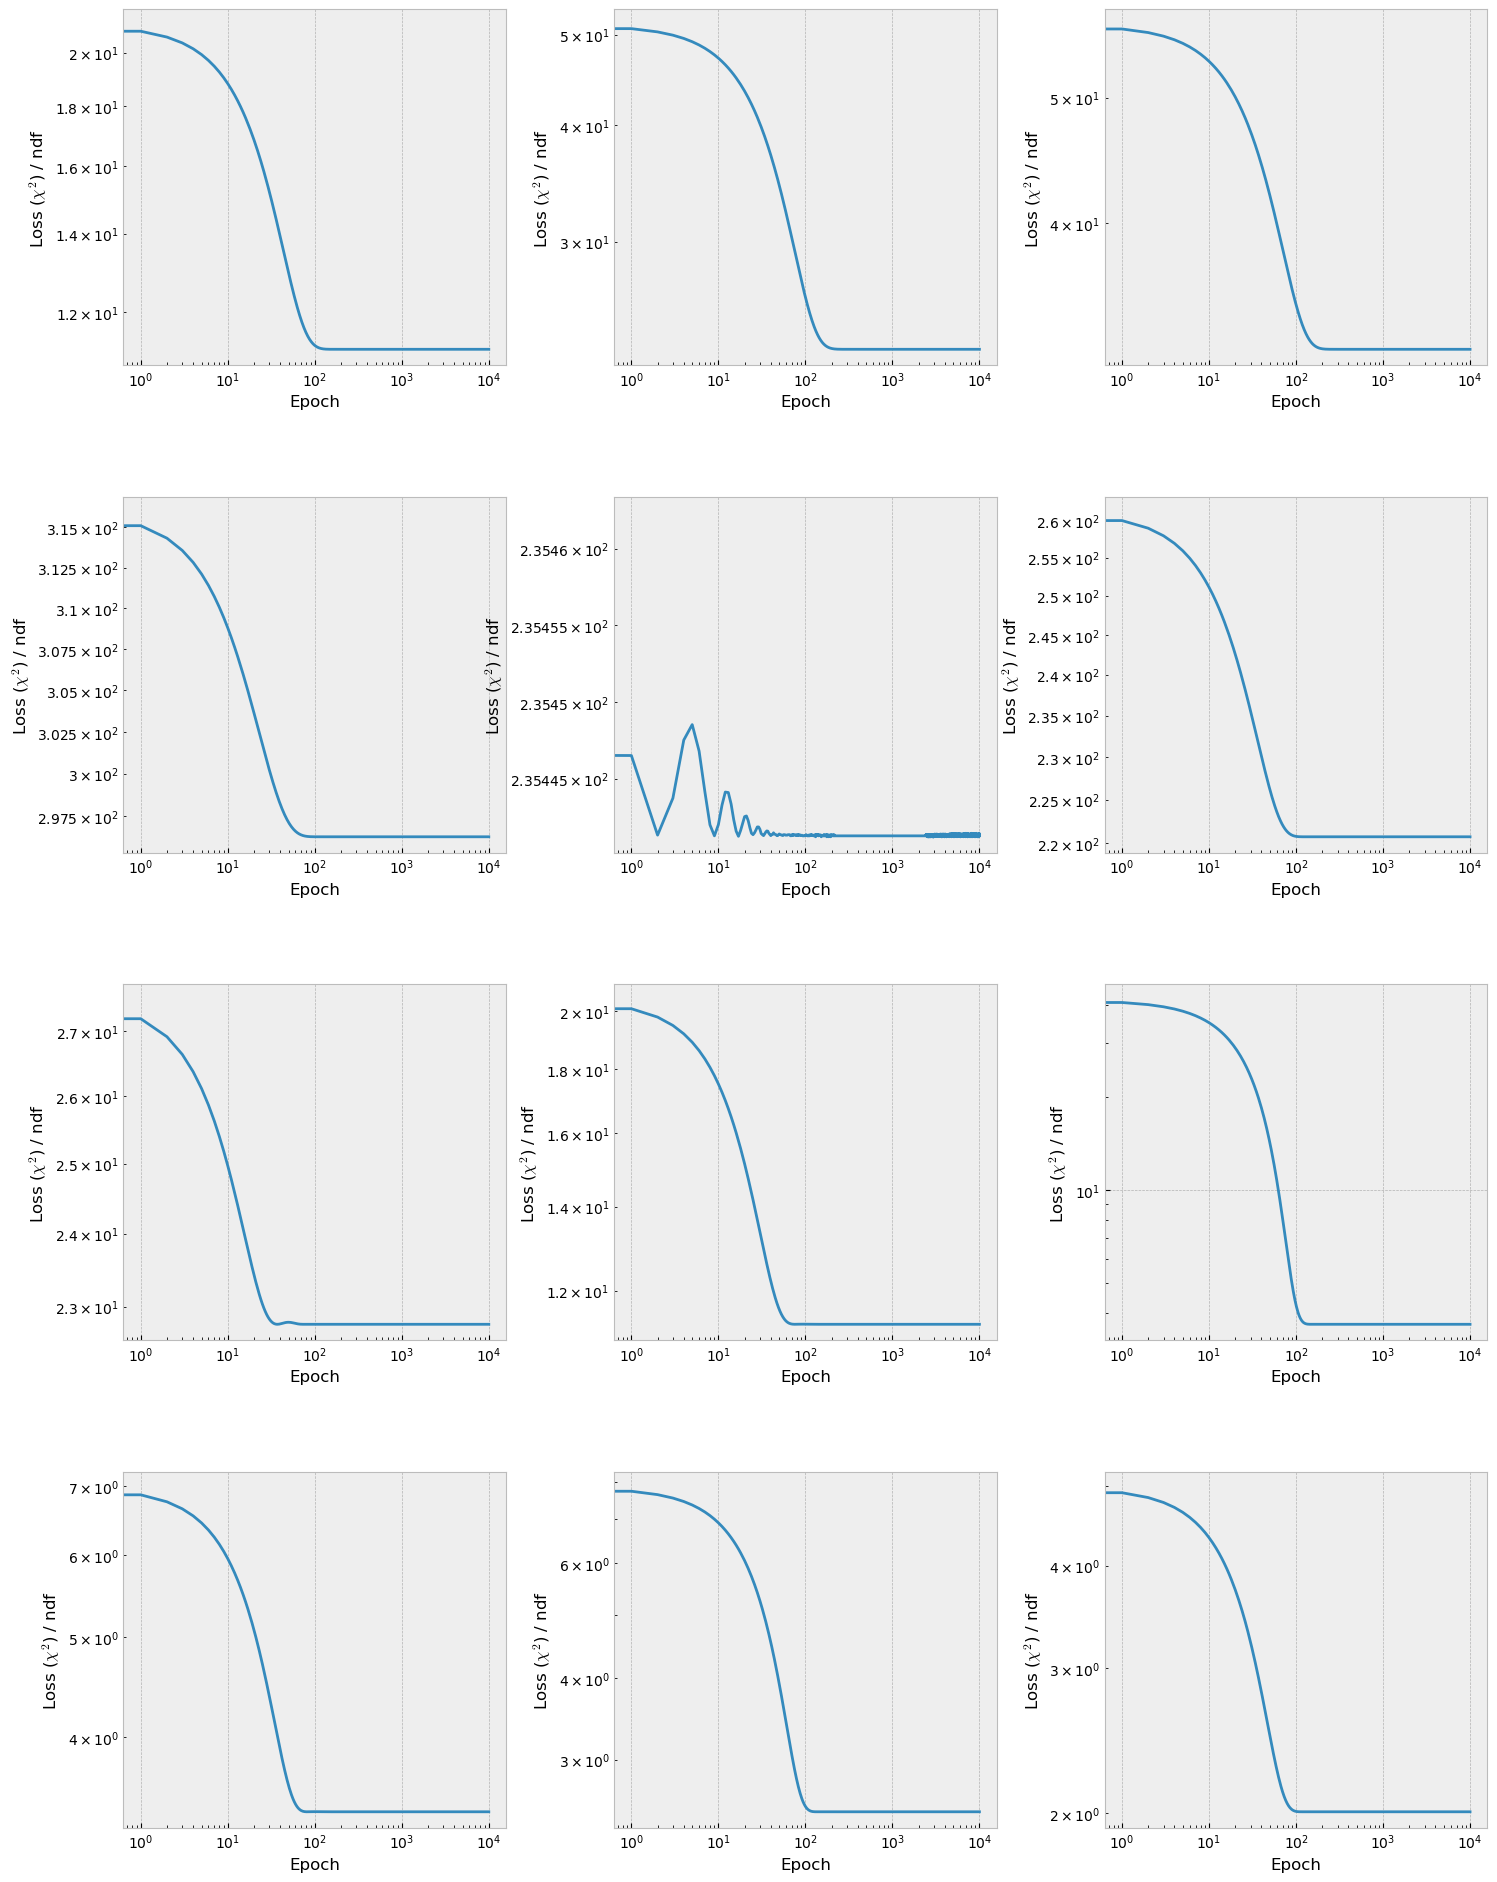

In [11]:
fig_np, ax_np = plot_losses(losses_all_np, range_used)

# Calculating covariance matrix for parameters

In general, if the value of the fitted model with $m$ parameters at point $x_i$ can be expressed as ({cite}`@cowan1998statistical`):
$$f(x_i,\mathbf{\lambda})=\sum_{j=1}^{m}a_j(x_i)\lambda_j\equiv\sum_{j=1}^{m}A_{ij}\lambda_j,$$
then the expression for $\chi^2$ is:
$$\chi^2=(\mathbf{y}-A\mathbf{\lambda})^T V^{-1}(\mathbf{y}-A\mathbf{\lambda}),$$
where $V$ is the covariance matrix of different data points. We have only statistical errors at each data point (histogram bin in our case), so we assume, witn $n$ data points (bins),
$$V^{-1}=\mathrm{diag}\left(\frac{1}{\sigma^2_{1}},\frac{1}{\sigma^2_{2}},\frac{1}{\sigma^2_{3}},...,\frac{1}{\sigma^2_{n}}\right).$$
The covariance matrix for for parameters, $U_{ij}=\mathrm{cov}[\hat{\lambda}_i,\hat{\lambda}_j]$ is calculated as
$$U=(A^TV^{-1}A)^{-1}.$$
In our case, the $i$-th row of matrix $A$, corresponding to the $i$-th data point (bin) has the following form:
$$\left(\frac{c_i}{I}\;\;\;\frac{c_i}{I}\cos^2(\theta_i)\;\;\;\frac{c_i}{I}\sin(2\theta_i)cos(\phi_i)\;\;\;\frac{c_i}{I}\sin^2(\theta_i)\cos(2\phi_i)\right),$$
where $\theta_i$, $\phi_i$ are values corresponding the bin center. Note, that one of the axes is $\cos(\theta)$, so $\arccos$ has to be calculated. $c_i$ is the bin content of the **unweighted** model histogram. $I$ is the integral of the model histogram **after applying the weights**. Thanks to that, the weighted histogram is always normalized to unity and can be compared to the experimental data histogram ($\mathbf{y}$) which is also normalized to unity all the time.

For the errors of the fit parameters, we just use square roots of the diagonal elements of the matrix $U$. However, with the matrix $A$ given above, we calculate the covariance matrix for the fit:
$$f(\theta,\phi)=A+B\cos^2(\theta_i)+C\sin(2\theta_i)cos(\phi_i)+D\sin^2(\theta_i)\cos(2\phi_i).$$
In order to get correct errors of the parameters of the fit:
$$f(\theta,\phi)\propto1+\lambda_\theta\cos^2(\theta_i)+\lambda_{\theta\phi}\sin(2\theta_i)cos(\phi_i)+\lambda_\phi\sin^2(\theta_i)\cos(2\phi_i),$$
we use error propagation to calculate the errors of ratios of ${B, C, D}$ parameters to $A$.

{bibliography}

Maybe covariance matrix:
tensor([[ 4.1381e-05, -2.3223e-04],
        [-2.3223e-04,  3.1532e-03]])
Compare:
Old: 37.113946386558794, new: 0.0064327752482805645
Old: 113.5635087788196, new: 0.056153635341882904
Old: 113.86997020750162, new: 0.056172276493886925, new/old: 0.0004933019337014489
Maybe covariance matrix:
tensor([[ 4.9443e-05, -2.5469e-04],
        [-2.5469e-04,  3.0667e-03]])
Compare:
Old: 29.616020451117894, new: 0.007031546475117126
Old: 90.62089931003086, new: 0.05537800737307892
Old: 90.91071844927119, new: 0.05540477780395477, new/old: 0.0006094416450450892
Maybe covariance matrix:
tensor([[ 7.6016e-05, -3.4587e-04],
        [-3.4587e-04,  3.4997e-03]])
Compare:
Old: 7.925644012221432, new: 0.008718693183609974
Old: 25.891086909105958, new: 0.059157858810573935
Old: 25.952599755635894, new: 0.05919046749272754, new/old: 0.0022807143812200808
Maybe covariance matrix:
tensor([[ 1.4751e-05, -4.7809e-05],
        [-4.7809e-05,  3.9060e-04]])
Compare:
Old: 0.0687057288671994

Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_0_np.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_0_np.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/comparison_2.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_0_np.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_3_np.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_3_np.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/comparison_5.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_3_np.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_6_np.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_6_np.gif has been created
Info in <T

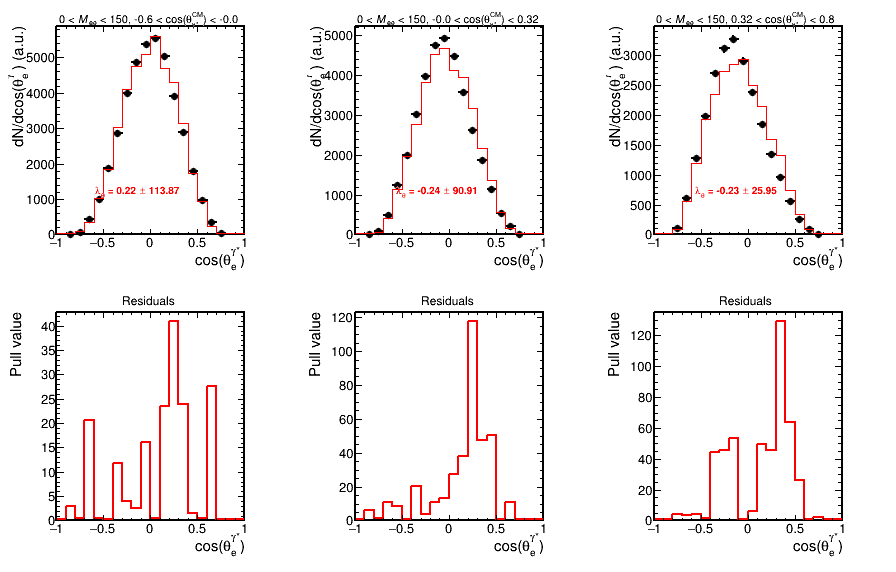

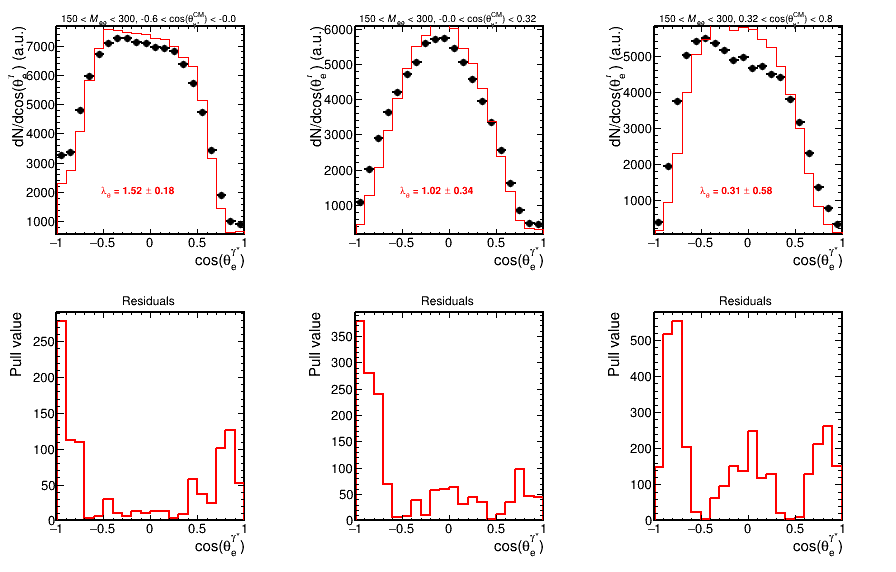

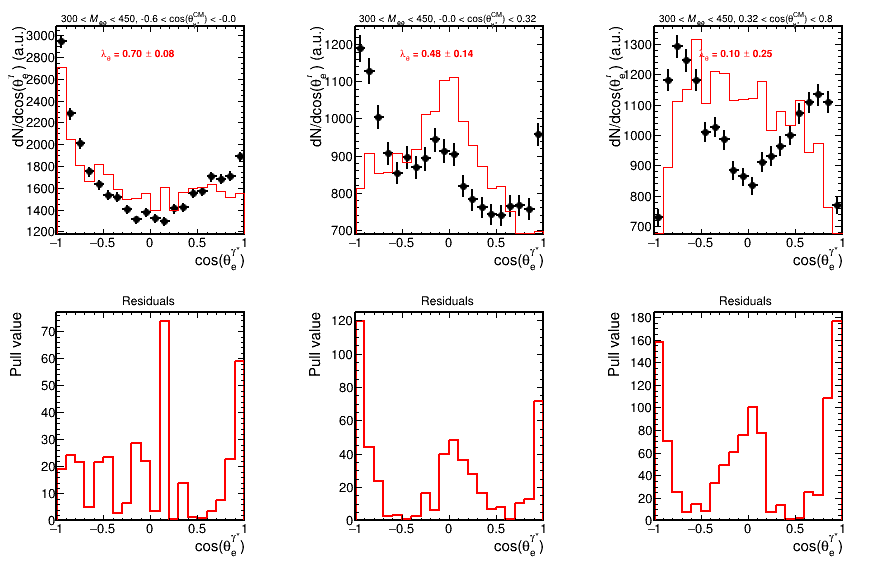

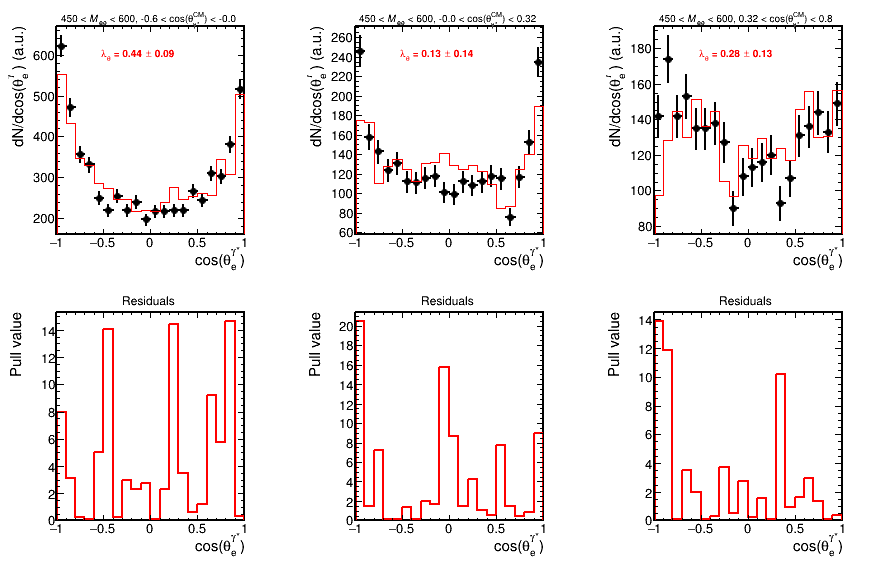

In [12]:
df_np = show_results("np", DIR_NAME, range_used, parameters_all_np, get_hist_maker_mc, bins, histsData_np, analyse_3d)

# Plotting e+e+ pairs

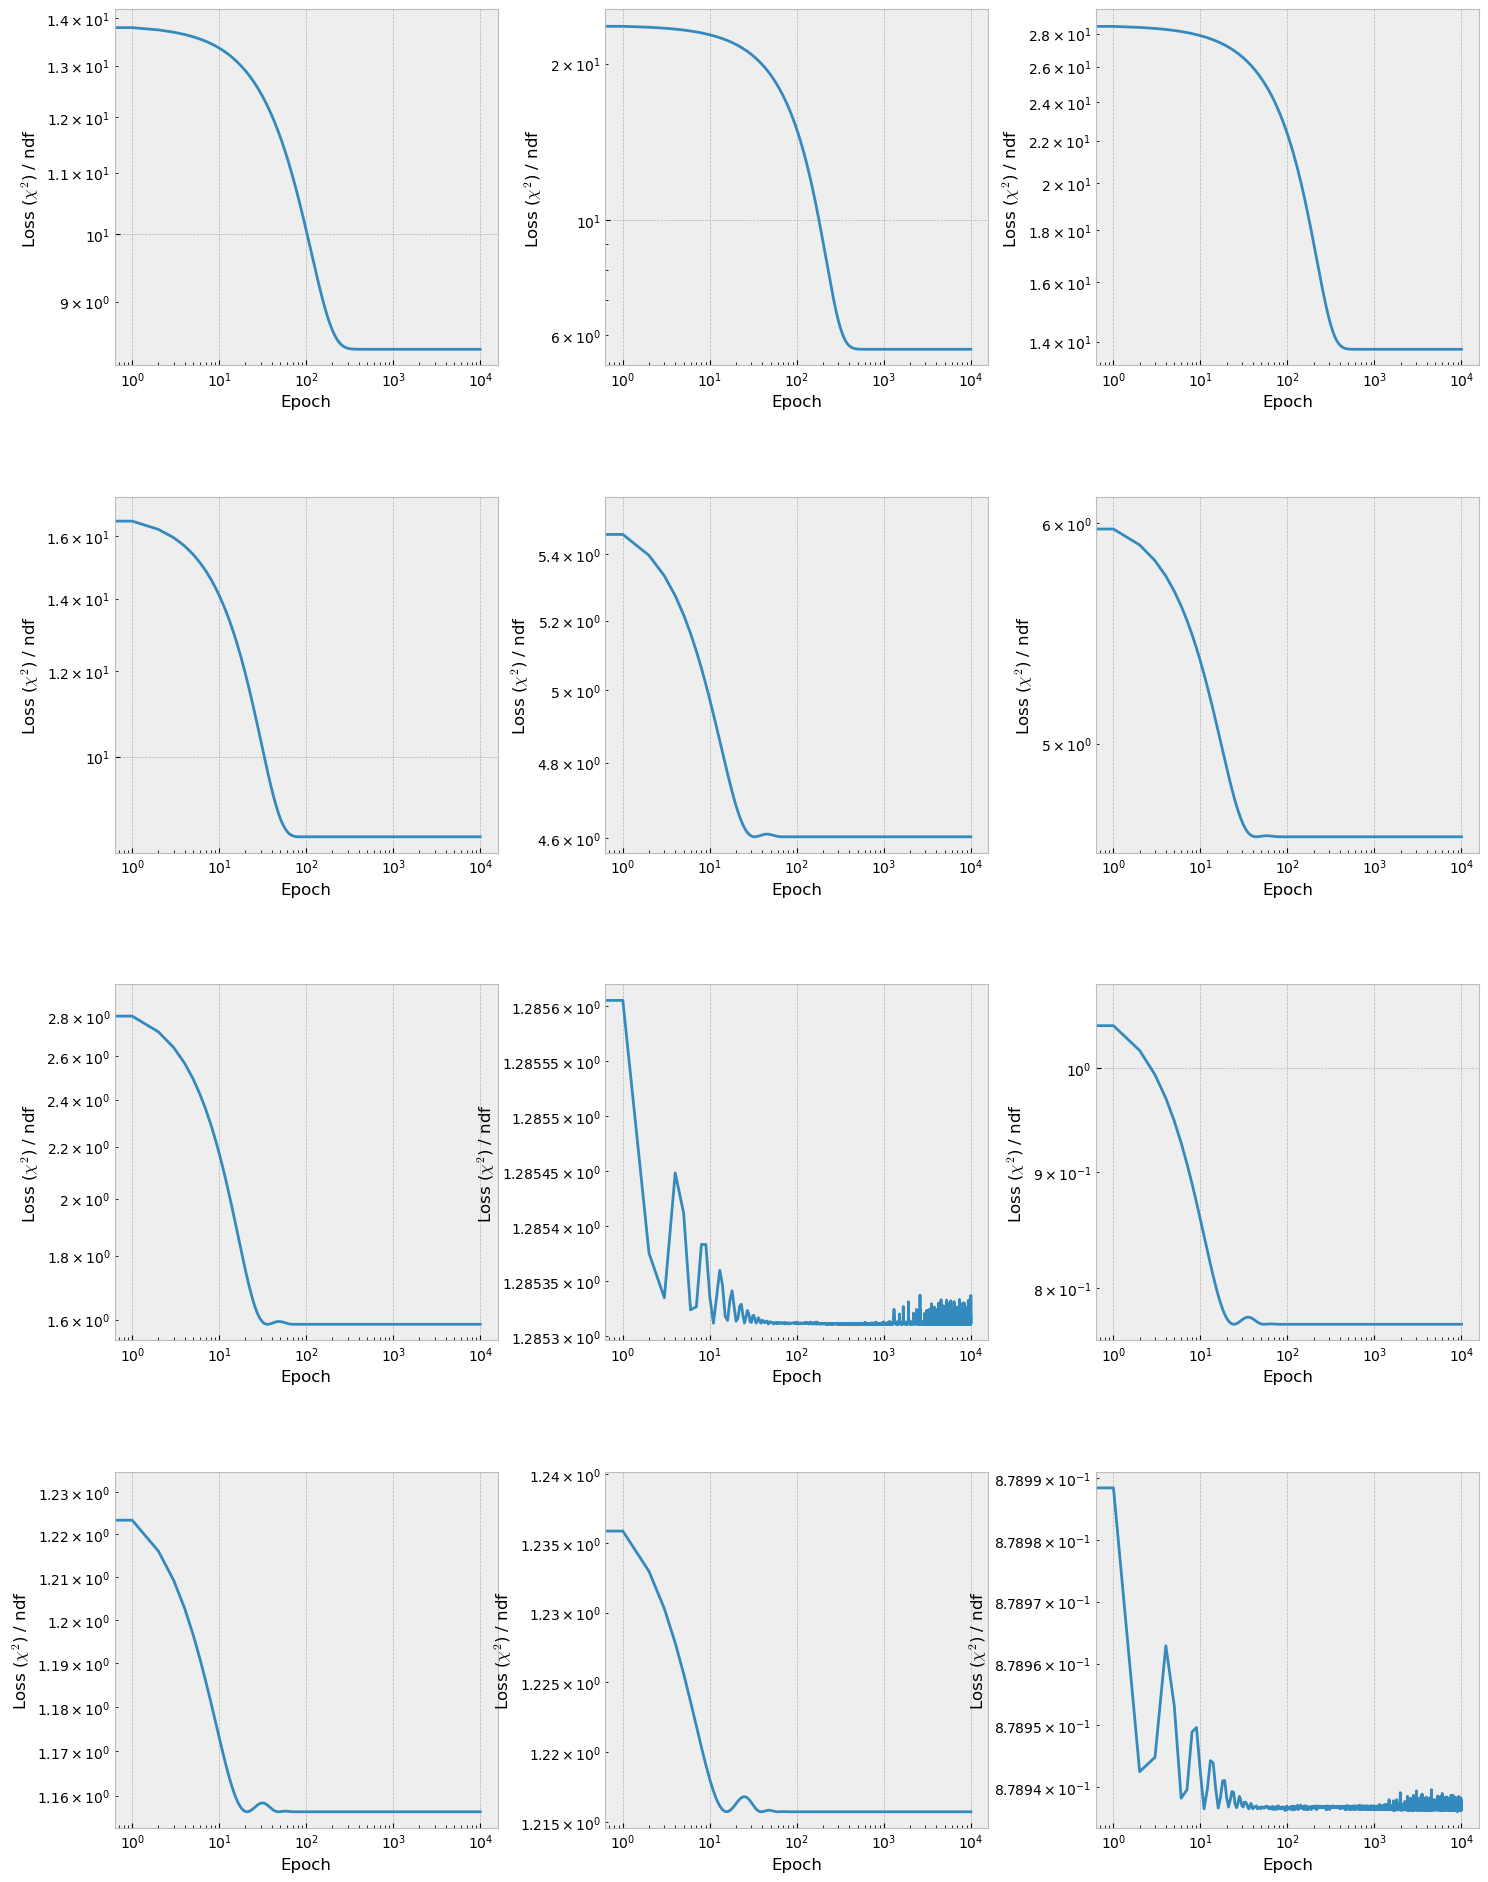

In [13]:
fig_pp, ax_pp = plot_losses(losses_all_pp, range_used)

Maybe covariance matrix:
tensor([[ 0.0007, -0.0039],
        [-0.0039,  0.0461]])
Compare:
Old: 0.22227275942379726, new: 0.027101551020716867
Old: 0.7261092376713162, new: 0.21480776745575073
Old: 0.7554438661218229, new: 0.21630648999615634, new/old: 0.2863303280316459
Maybe covariance matrix:
tensor([[ 0.0011, -0.0050],
        [-0.0050,  0.0460]])
Compare:
Old: 0.4013684685177344, new: 0.03345130631480016
Old: 1.6803186169043054, new: 0.2144292821640924
Old: 1.8466208135308821, new: 0.22372763404755103, new/old: 0.12115515671014584
Maybe covariance matrix:
tensor([[ 0.0029, -0.0121],
        [-0.0121,  0.0858]])
Compare:
Old: 9.919573944000891, new: 0.05407366084785355
Old: 41.528037395212294, new: 0.2929057880138717
Old: 47.166827080719074, new: 0.31726258549047837, new/old: 0.006726392363589143
Maybe covariance matrix:
tensor([[ 5.6102e-05, -1.6614e-04],
        [-1.6614e-04,  1.1250e-03]])
Compare:
Old: 0.049322234326183725, new: 0.007490127238964659
Old: 0.1055431609087454, new

Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_0_pp.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_0_pp.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/comparison_2.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_0_pp.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_3_pp.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_3_pp.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/comparison_5.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_3_pp.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_6_pp.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_6_pp.gif has been created
Info in <T

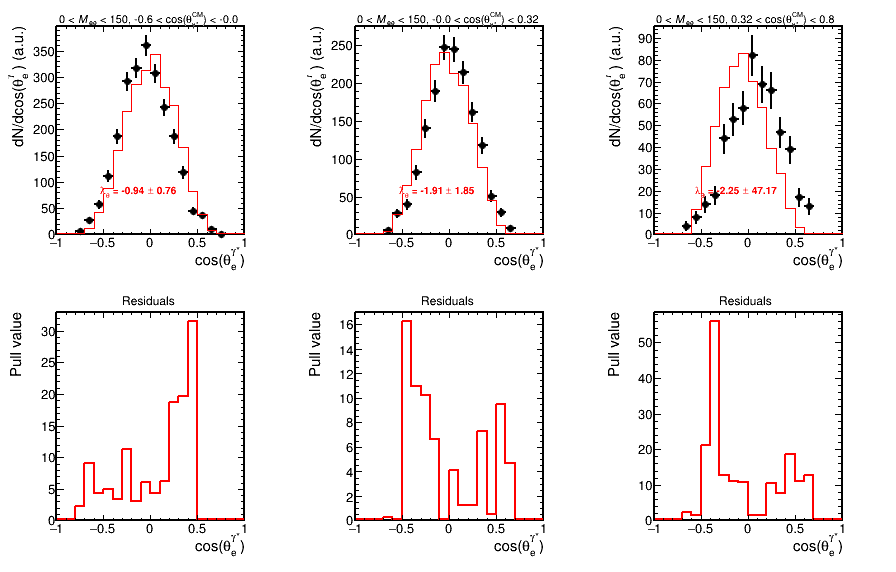

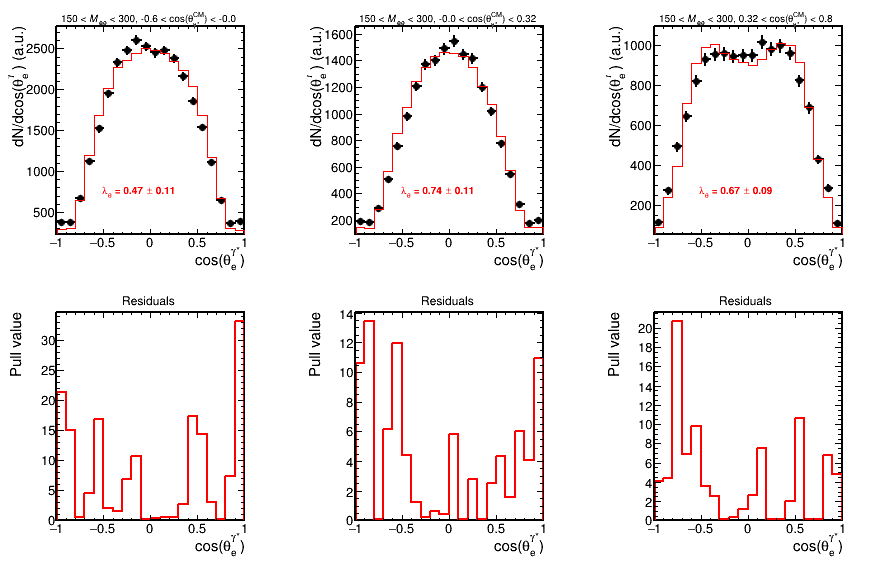

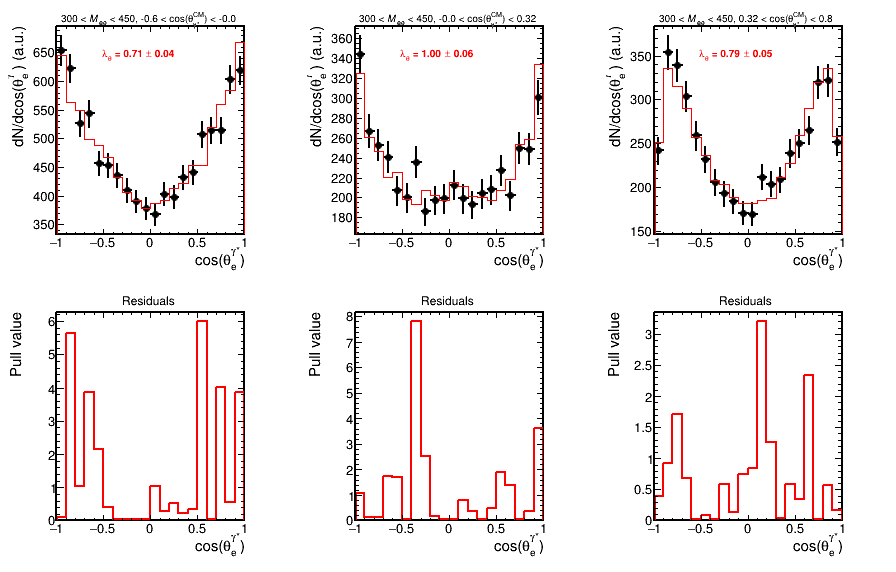

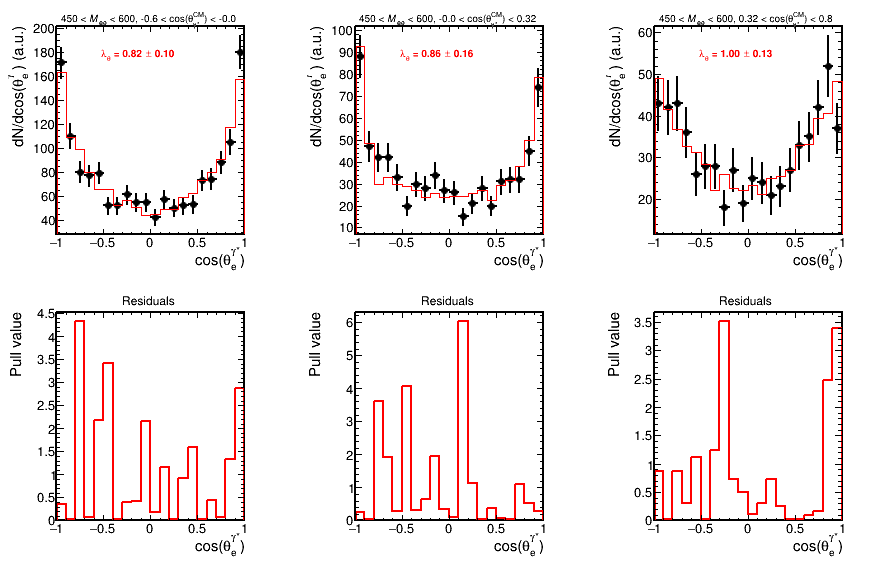

In [14]:
df_pp = show_results("pp", DIR_NAME, range_used, parameters_all_pp, get_hist_maker_mc, bins, histsData_pp, analyse_3d)

# Plotting e-e- pairs

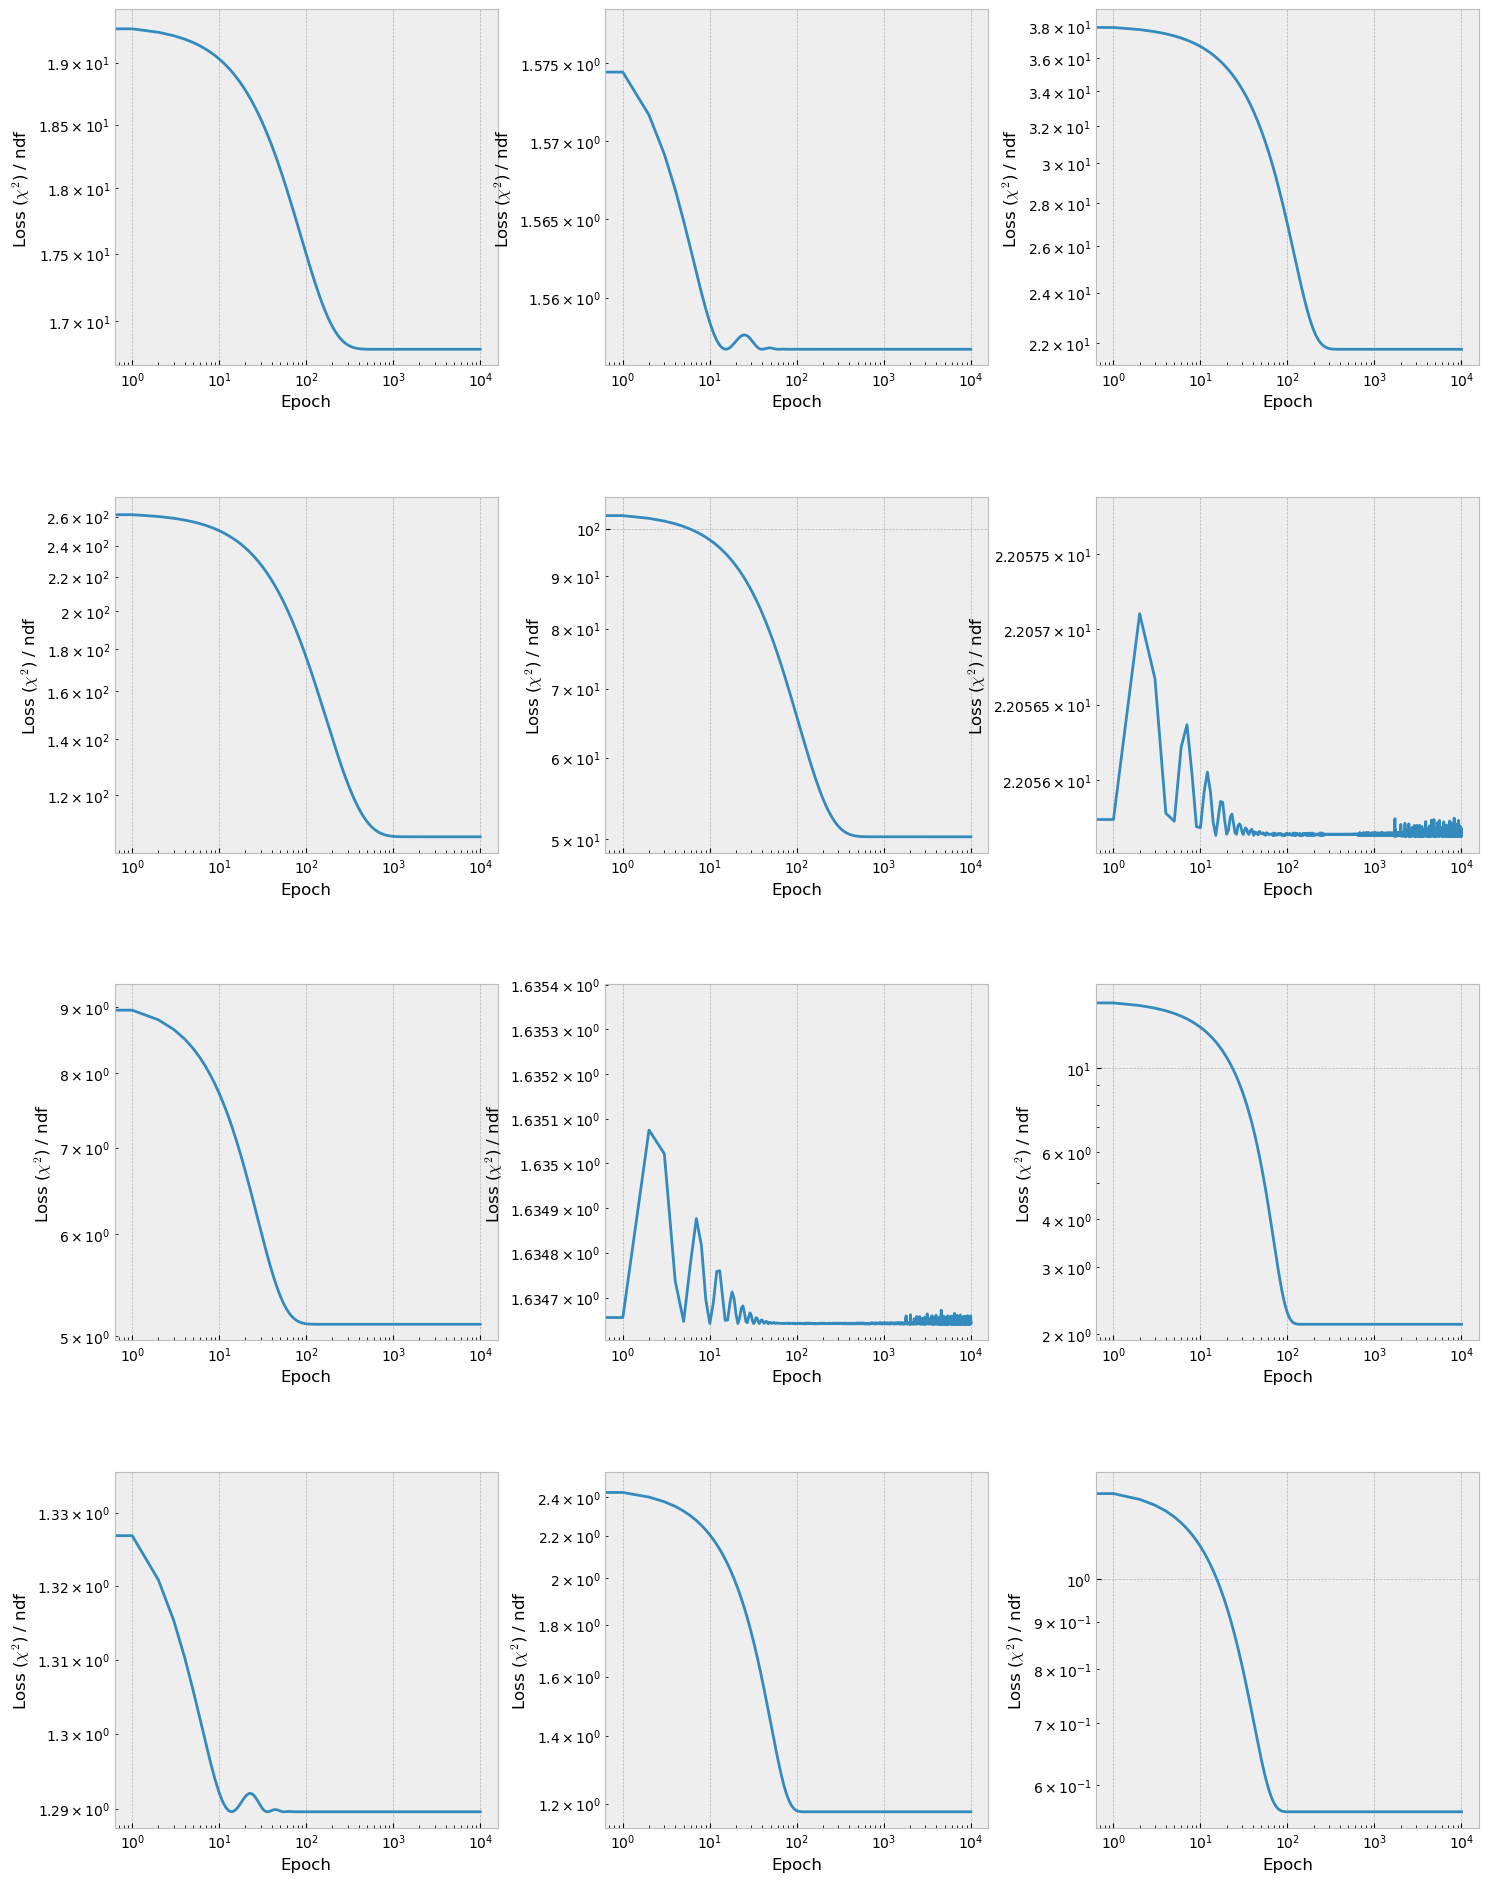

In [15]:
fig_nn, ax_nn = plot_losses(losses_all_nn, range_used)

Maybe covariance matrix:
tensor([[ 0.0006, -0.0038],
        [-0.0038,  0.0624]])
Compare:
Old: 0.18287075344387074, new: 0.024069673299969233
Old: 0.5973927876710018, new: 0.24973794494399099
Old: 0.8094163212345354, new: 0.2598777207498546, new/old: 0.32106805105373304
Maybe covariance matrix:
tensor([[ 0.0005, -0.0028],
        [-0.0028,  0.0392]])
Compare:
Old: 81.01634049636996, new: 0.022688664892466924
Old: 247.89872247375467, new: 0.19802709476926725
Old: 264.36621118882846, new: 0.19969058304520892, new/old: 0.0007553559214213508
Maybe covariance matrix:
tensor([[ 0.0004, -0.0018],
        [-0.0018,  0.0160]])
Compare:
Old: 744.0587044326139, new: 0.02063916212104146
Old: 2430.6527712114666, new: 0.12658553826256716
Old: 2532.523839335075, new: 0.12811294237839224, new/old: 5.058706275082048e-05
Maybe covariance matrix:
tensor([[ 4.5349e-05, -1.0407e-04],
        [-1.0407e-04,  5.0602e-04]])
Compare:
Old: 0.1444406046196753, new: 0.006734149003140133
Old: 0.30908409125005704, 

Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_0_nn.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_0_nn.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/comparison_2.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_0_nn.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_3_nn.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_3_nn.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/comparison_5.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_3_nn.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_6_nn.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_6_nn.gif has been created
Info in <T

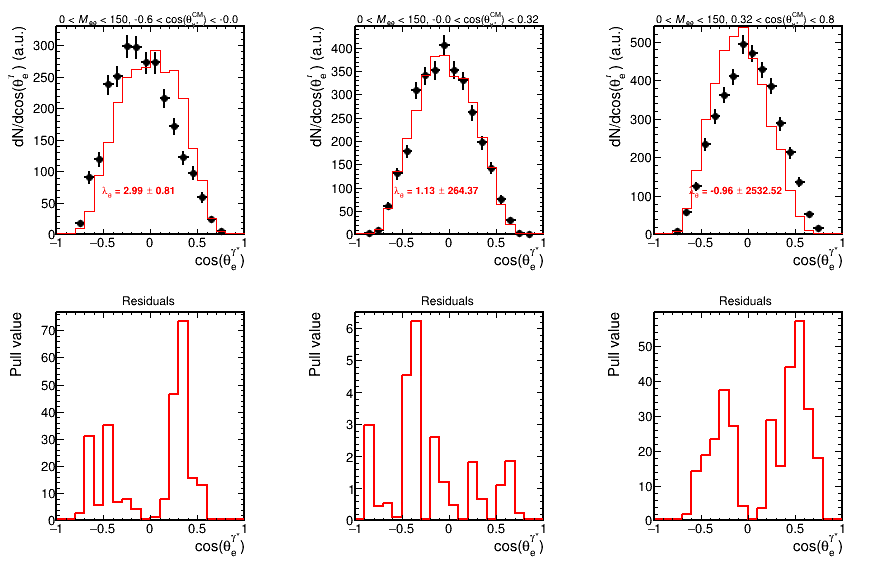

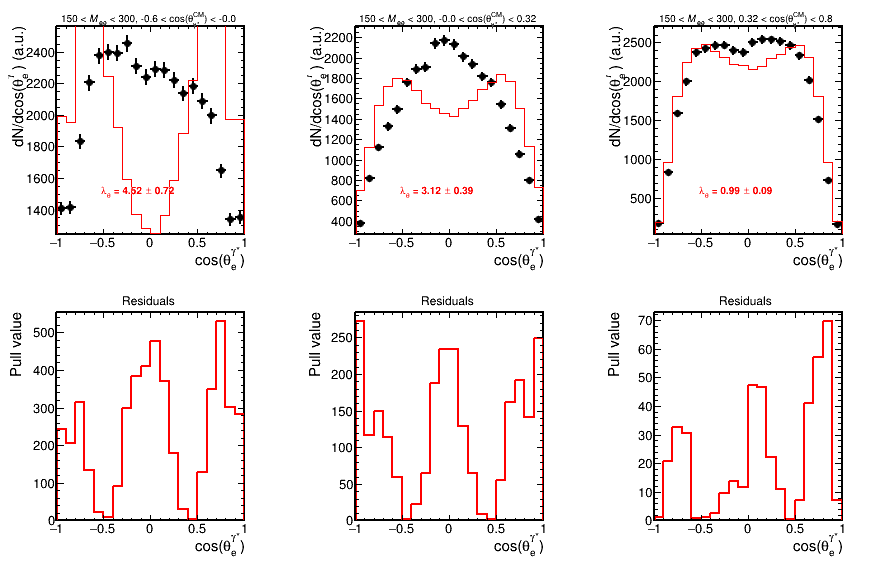

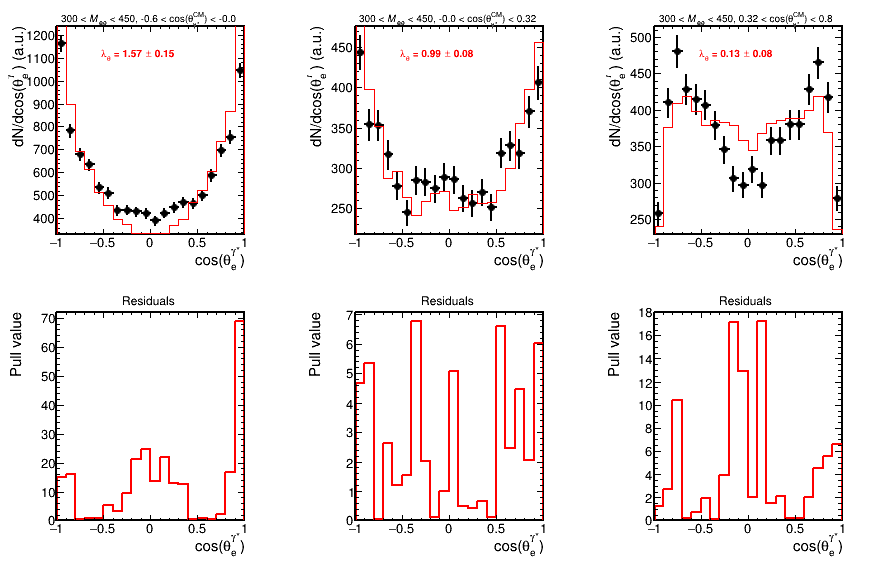

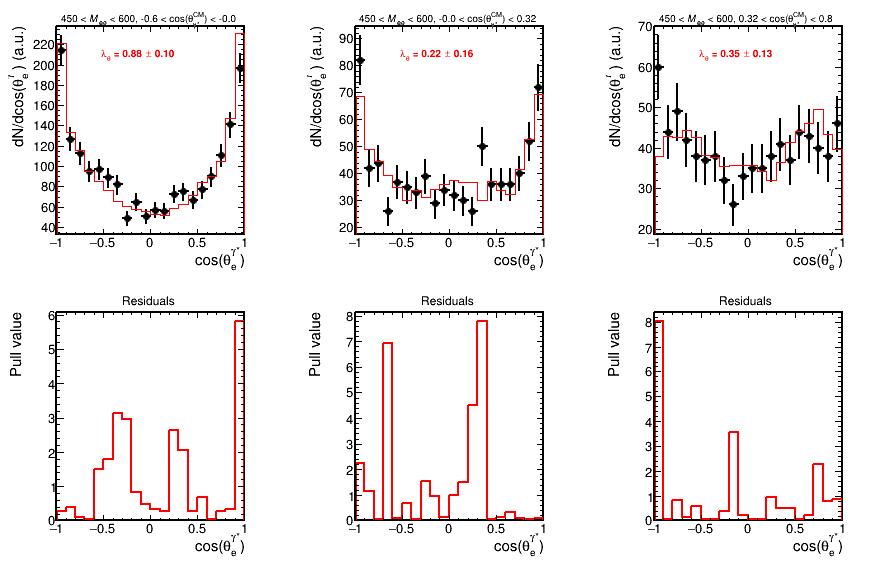

In [16]:
df_nn = show_results("nn", DIR_NAME, range_used, parameters_all_nn, get_hist_maker_mc, bins, histsData_nn, analyse_3d)

# Plotting signal

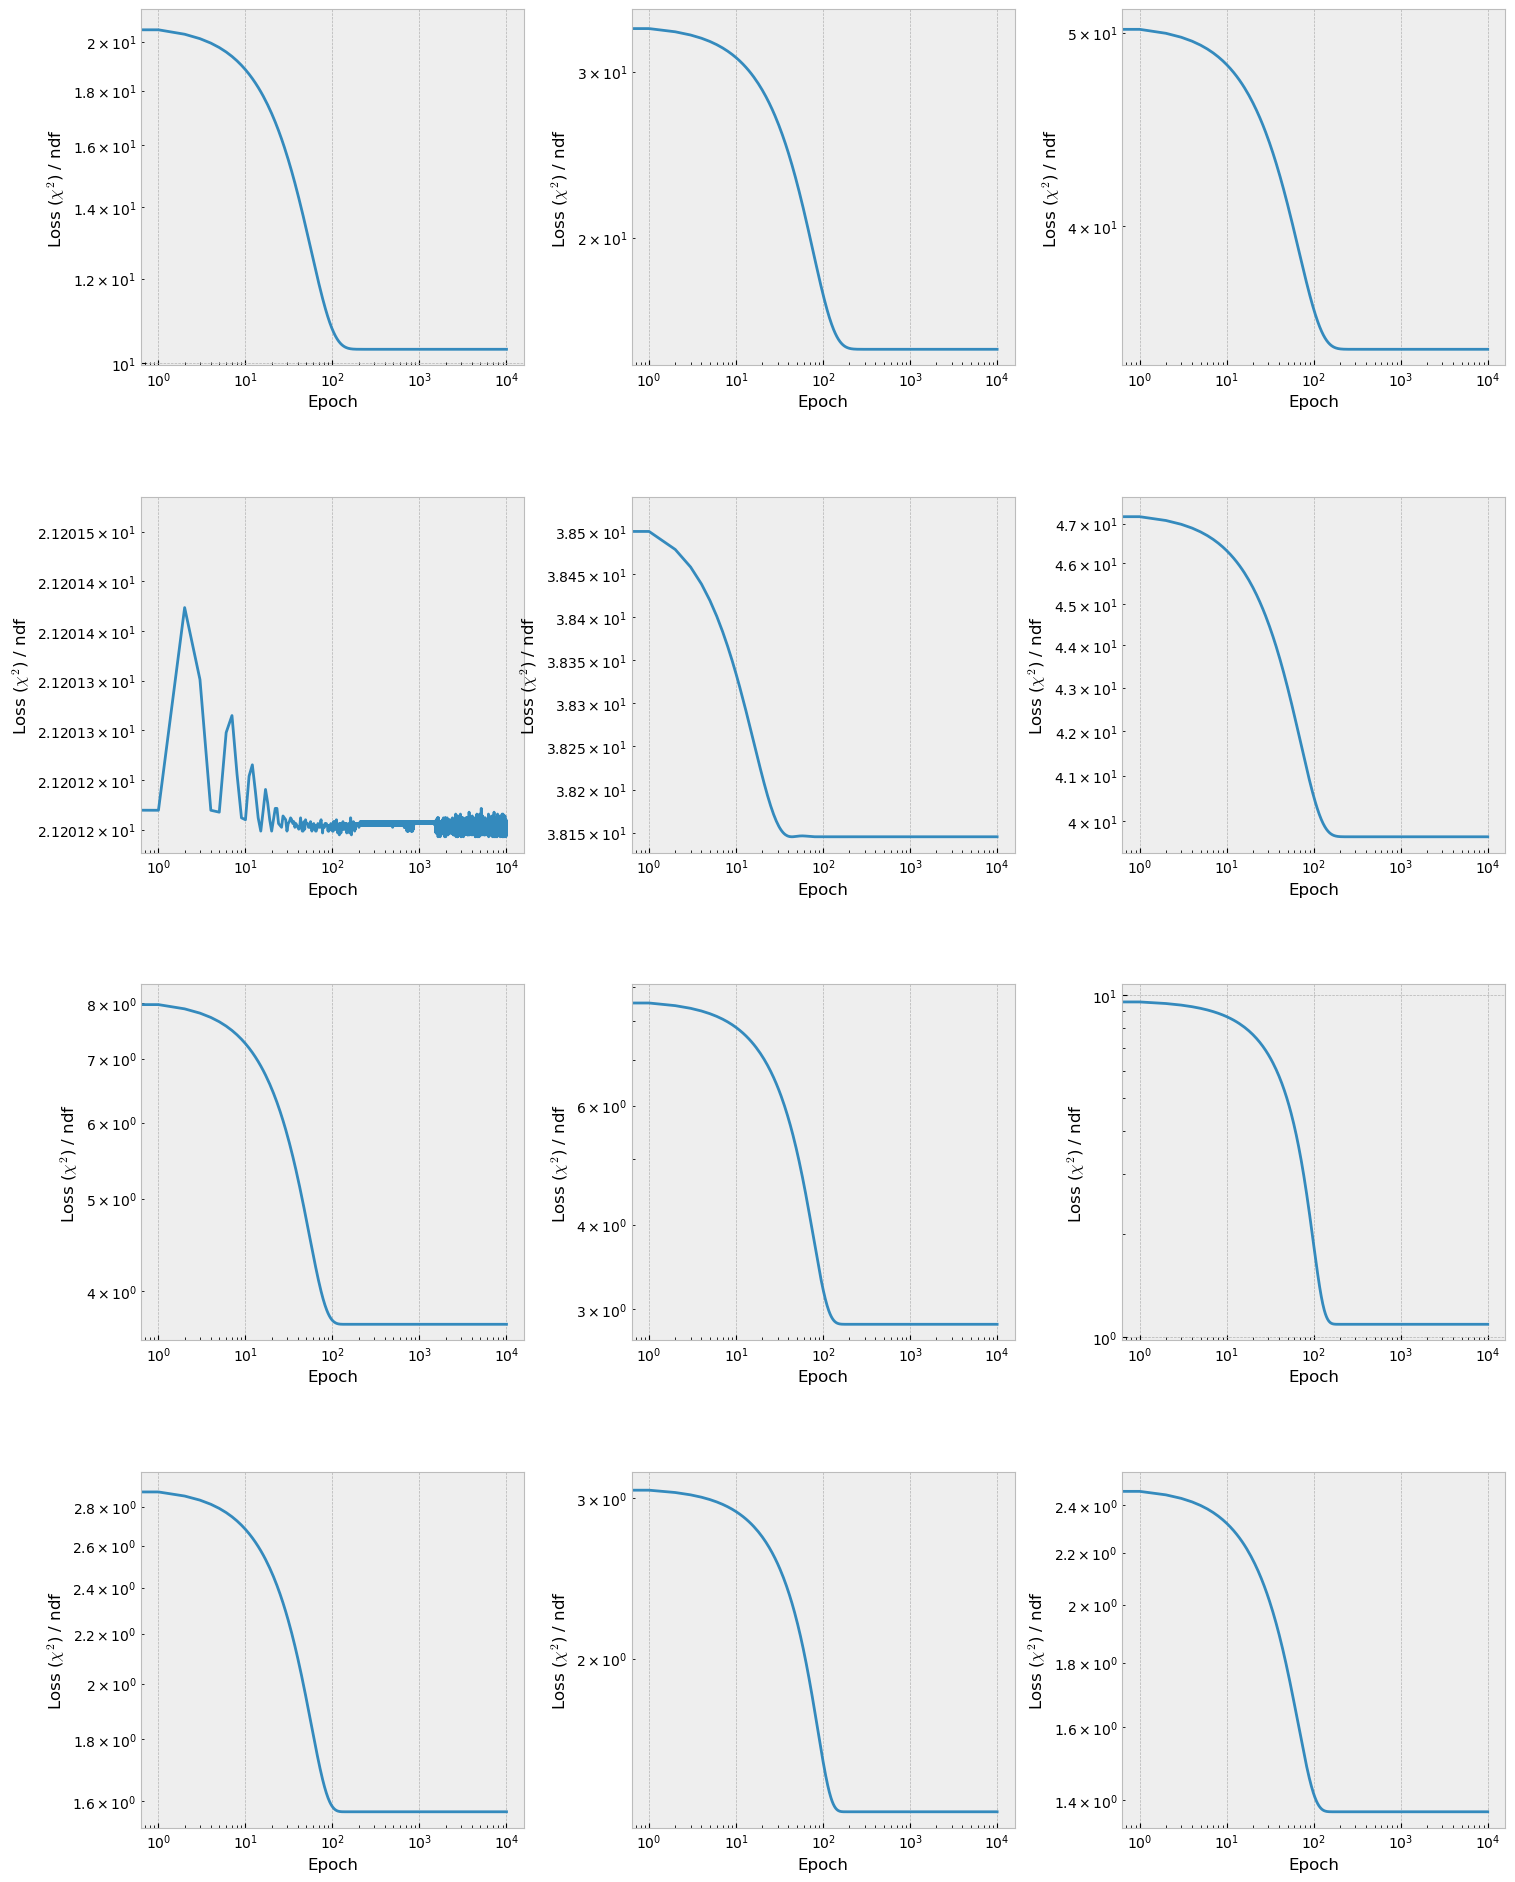

In [17]:
fig_sig, ax_sig = plot_losses(losses_all_sig, range_used)

Maybe covariance matrix:
tensor([[ 6.1157e-05, -3.5617e-04],
        [-3.5617e-04,  4.9983e-03]])
Compare:
Old: 47.45427446992523, new: 0.00782030942756157
Old: 145.20347308874645, new: 0.07069892462482644
Old: 145.20604018029118, new: 0.07069906781267064, new/old: 0.00048688792645876883
Maybe covariance matrix:
tensor([[ 7.6844e-05, -3.9816e-04],
        [-3.9816e-04,  4.8744e-03]])
Compare:
Old: 4.859932362930384, new: 0.008766063925211544
Old: 14.87071640977513, new: 0.06981656892926469
Old: 14.926860196850031, new: 0.06985553815529753, new/old: 0.004679854787548619
Maybe covariance matrix:
tensor([[ 0.0001, -0.0006],
        [-0.0006,  0.0059]])
Compare:
Old: 29.701704026565626, new: 0.011285794593193964
Old: 97.02800165065852, new: 0.07658820511444471
Old: 97.2456007022246, new: 0.07662804036256418, new/old: 0.0007879846472151128
Maybe covariance matrix:
tensor([[ 0.0002, -0.0008],
        [-0.0008,  0.0071]])
Compare:
Old: 0.21825294851198238, new: 0.015209675904078502
Old: 0.467

Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_0_sig.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_0_sig.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/comparison_2.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_0_sig.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_3_sig.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_3_sig.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/comparison_5.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_3_sig.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_6_sig.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_6_sig.gif has been created
In

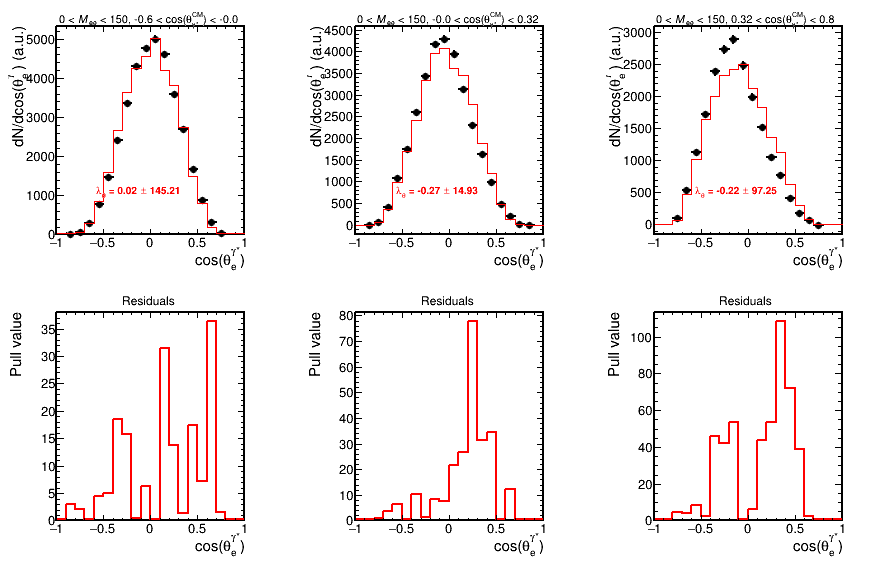

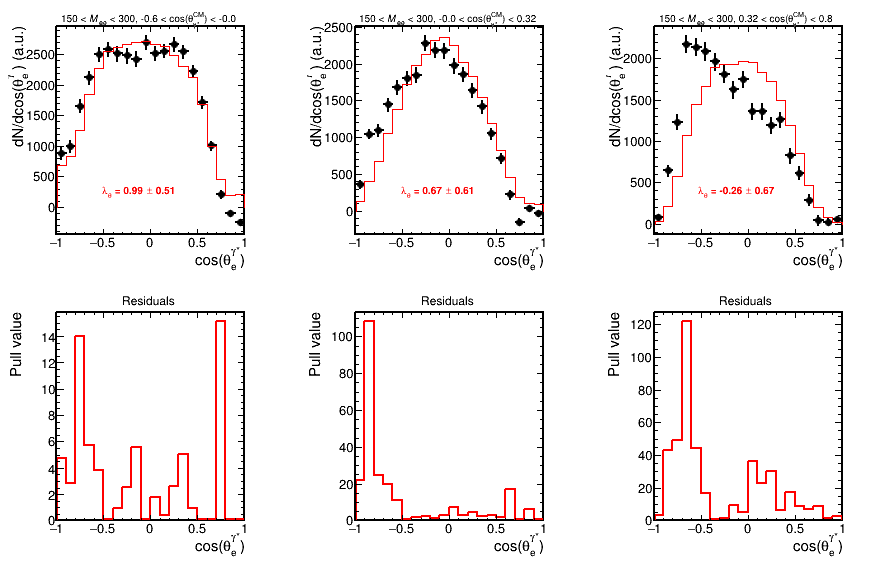

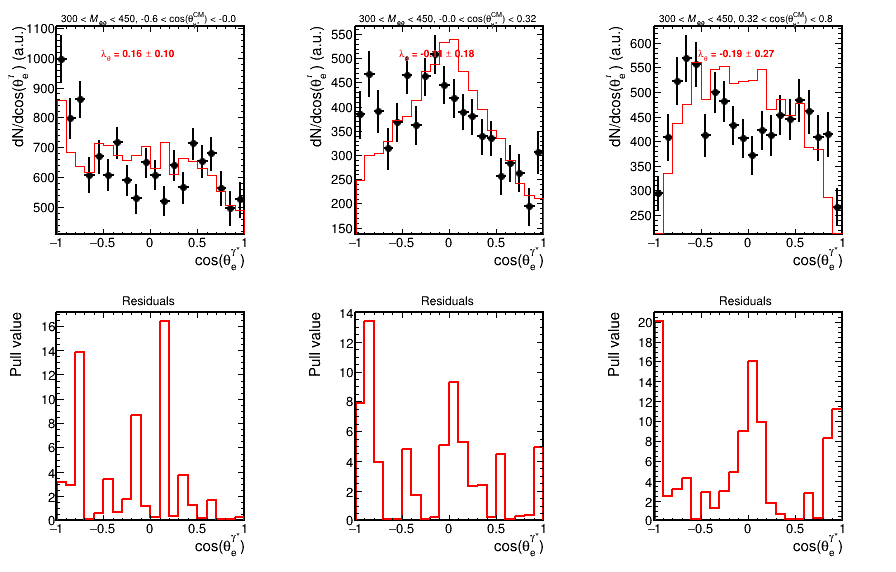

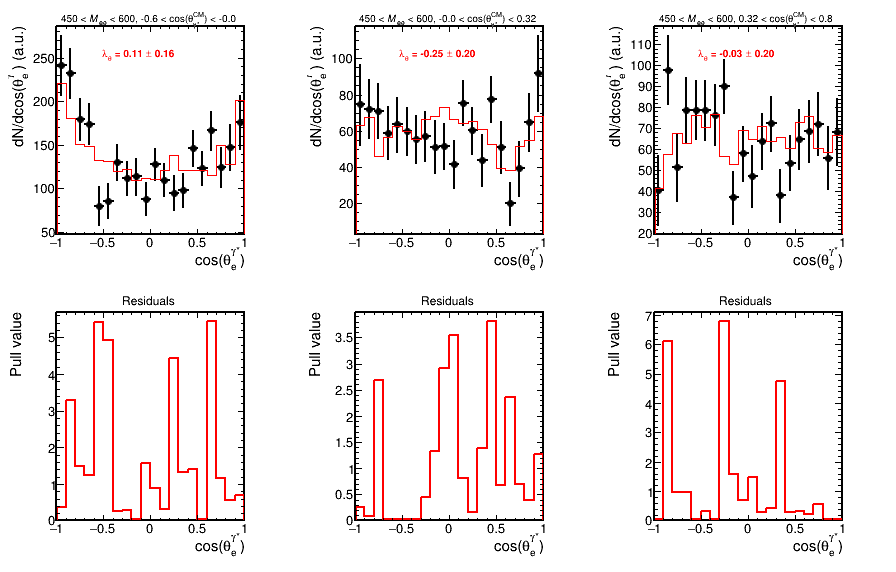

In [18]:
df_sig = show_results("sig", DIR_NAME, range_used, parameters_all_sig, get_hist_maker_mc, bins, histsData_sig, analyse_3d)


# Plotting combinatorial background

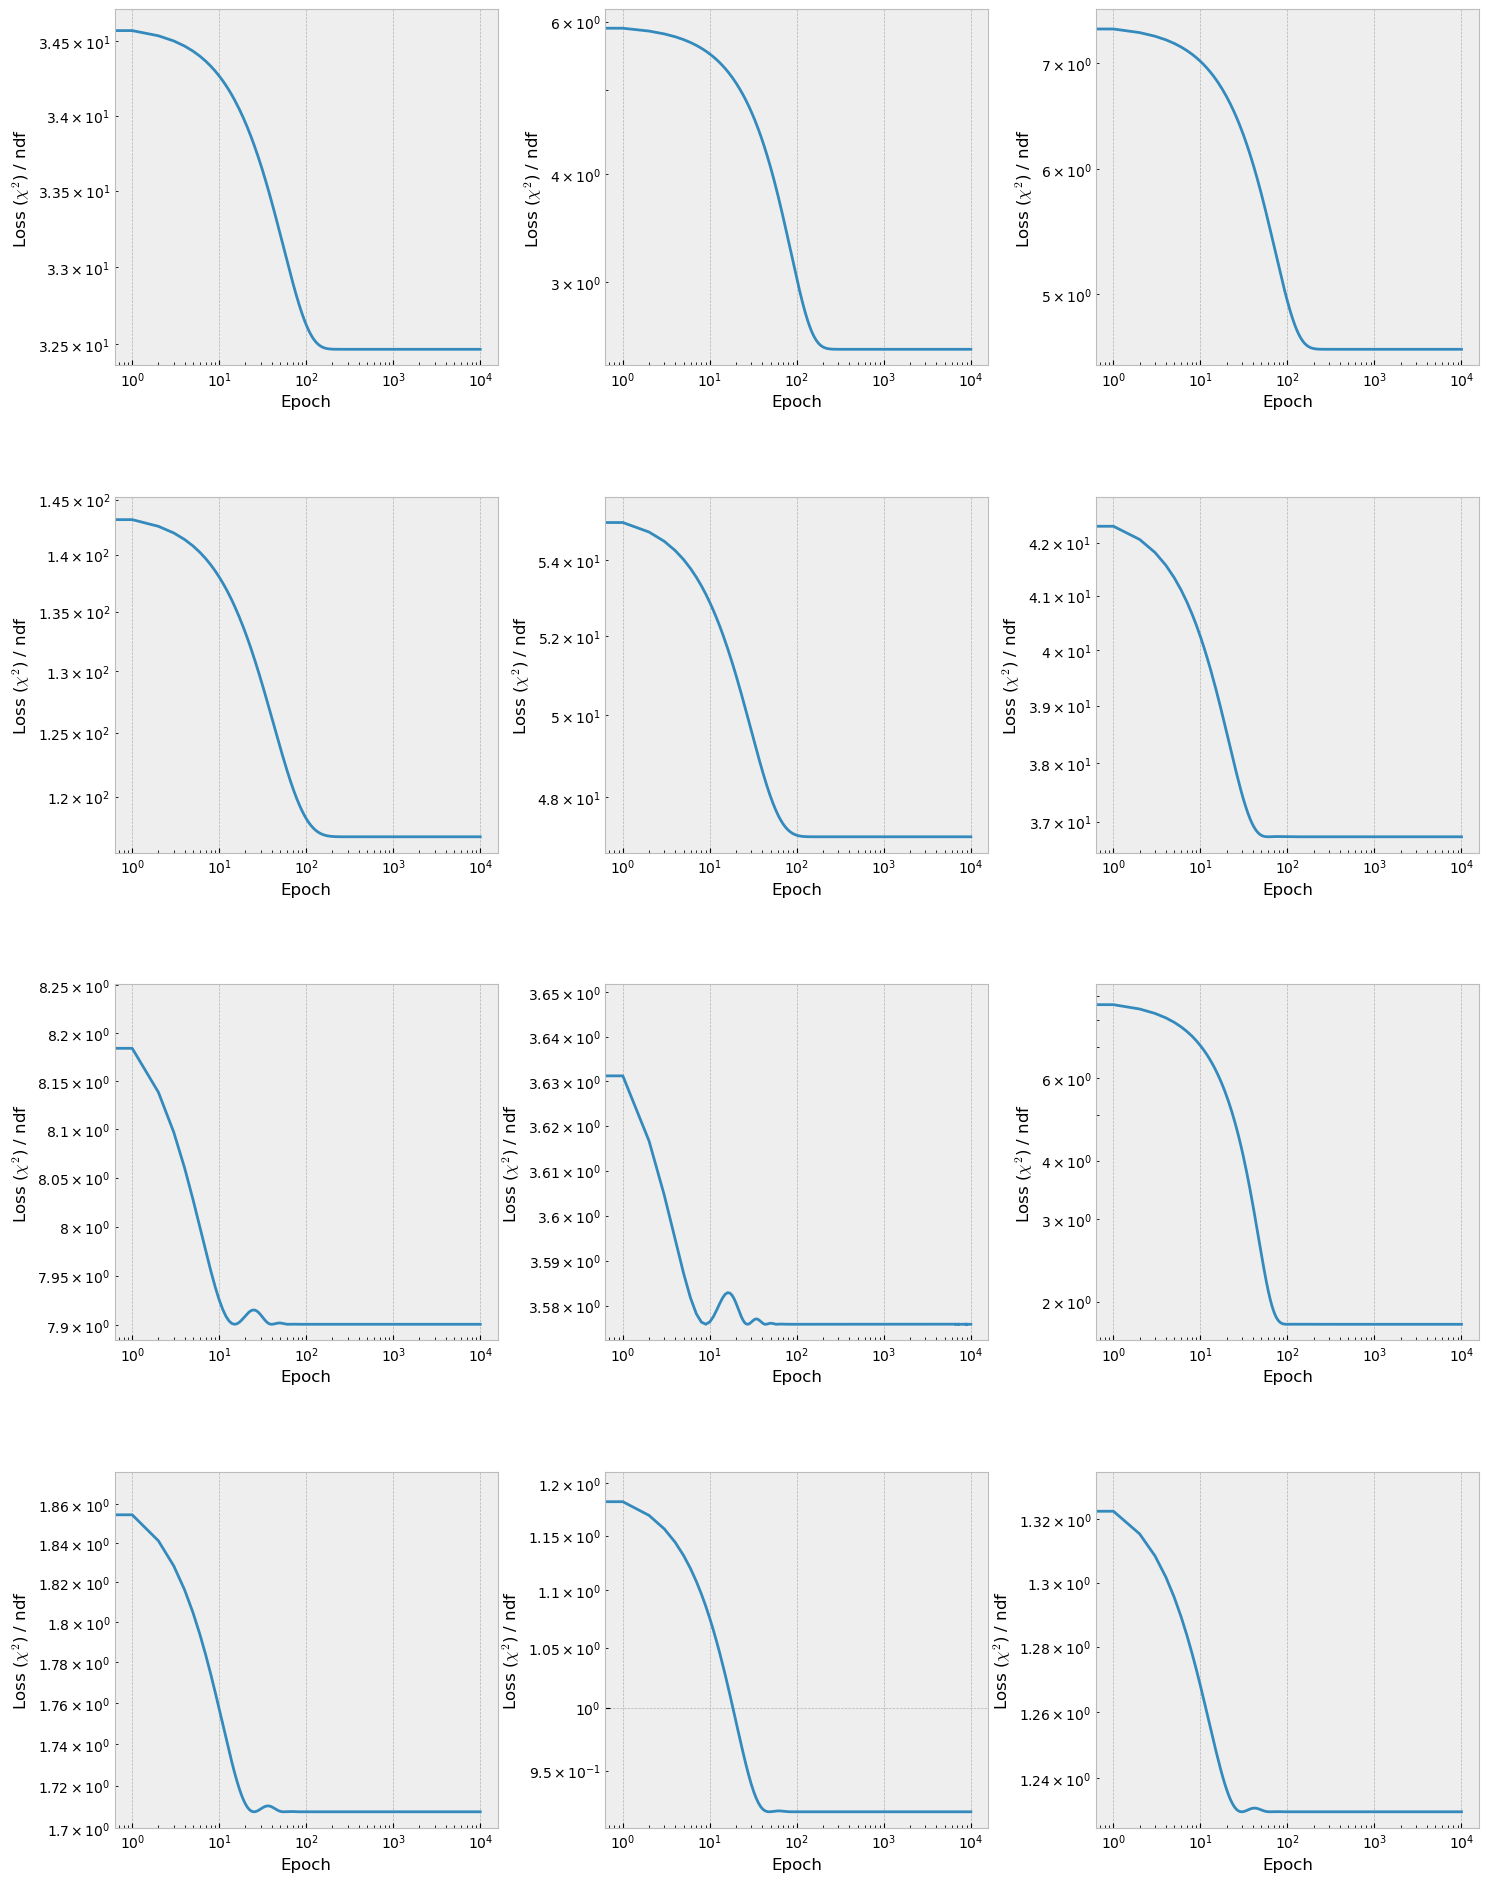

In [19]:
fig_bgr, ax_bgr = plot_losses(losses_all_bgr, range_used)

Maybe covariance matrix:
tensor([[ 0.0004, -0.0025],
        [-0.0025,  0.0335]])
Compare:
Old: 0.41687327500342736, new: 0.020583905670793042
Old: 1.3618202100111958, new: 0.18300248365267202
Old: 1.3625412118699731, new: 0.18301556781908485, new/old: 0.13431928973943577
Maybe covariance matrix:
tensor([[ 0.0005, -0.0025],
        [-0.0025,  0.0313]])
Compare:
Old: 221.88942240382244, new: 0.02271741613876077
Old: 678.9507401511368, new: 0.17690499642781593
Old: 684.0124285554922, new: 0.17710926588531042, new/old: 0.0002589269704635813
Maybe covariance matrix:
tensor([[ 0.0008, -0.0033],
        [-0.0033,  0.0340]])
Compare:
Old: 232.50536206168644, new: 0.02753761022201428
Old: 759.5365785656845, new: 0.1844393654182488
Old: 762.1452016310725, new: 0.18459025543070098, new/old: 0.0002421982780127173
Maybe covariance matrix:
tensor([[ 3.0422e-05, -1.1110e-04],
        [-1.1110e-04,  9.7641e-04]])
Compare:
Old: 0.16247912716601967, new: 0.0055156563515213666
Old: 0.347684181324528, ne

Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_0_bgr.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_0_bgr.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/comparison_2.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_0_bgr.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_3_bgr.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_3_bgr.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/comparison_5.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_3_bgr.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_6_bgr.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_6_bgr.gif has been created
In

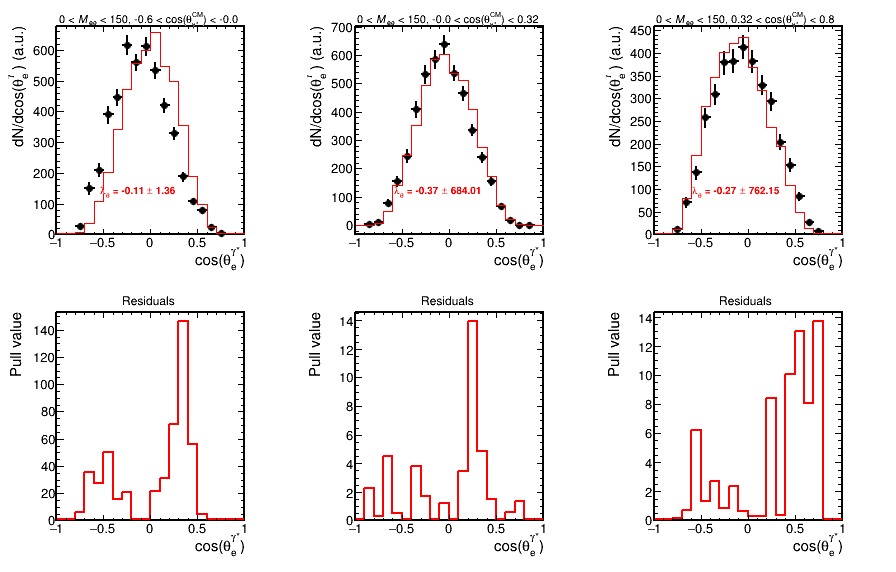

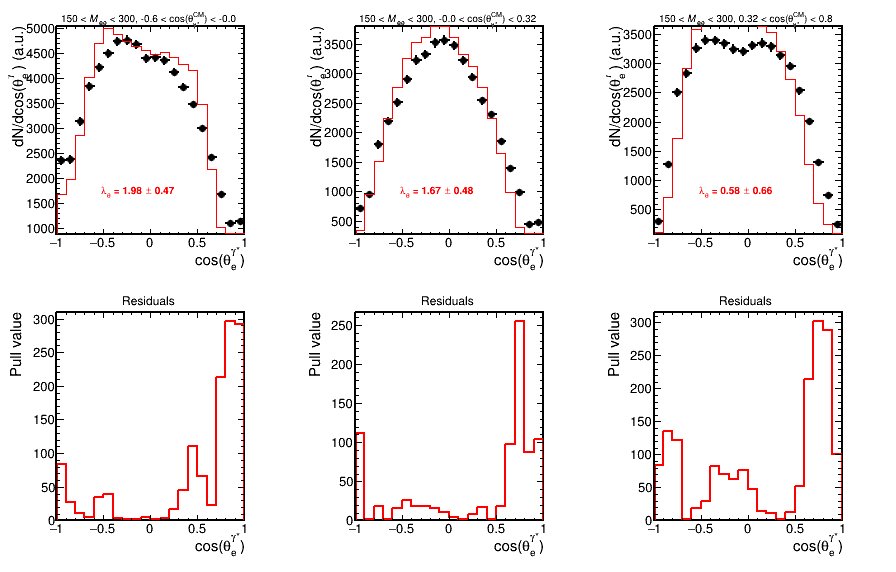

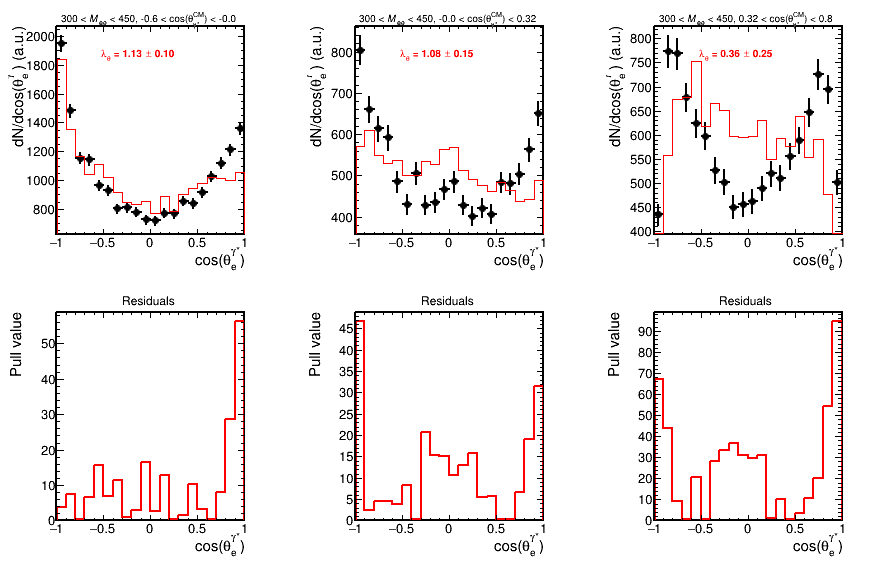

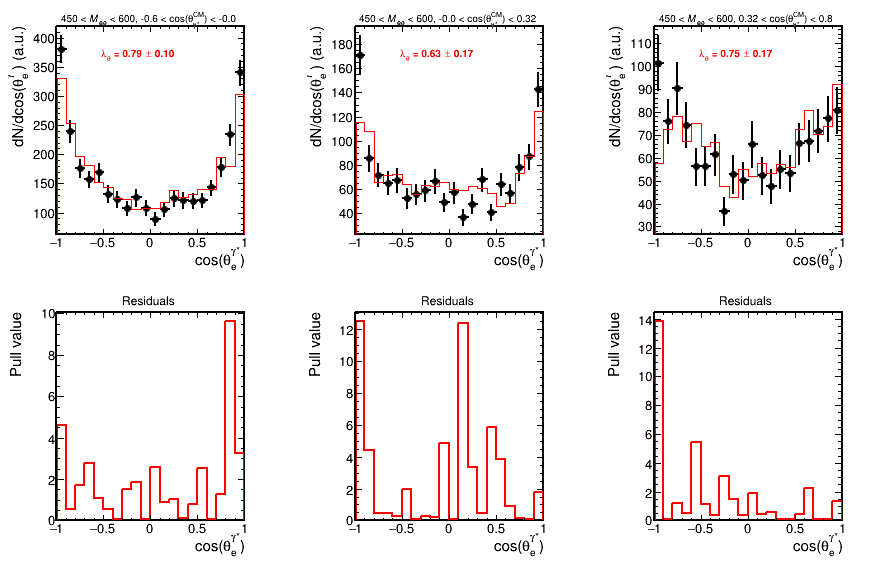

In [20]:
df_bgr = show_results("bgr", DIR_NAME, range_used, parameters_all_bgr, get_hist_maker_mc, bins, histsData_bgr, analyse_3d)

# Plotting $k$-factor

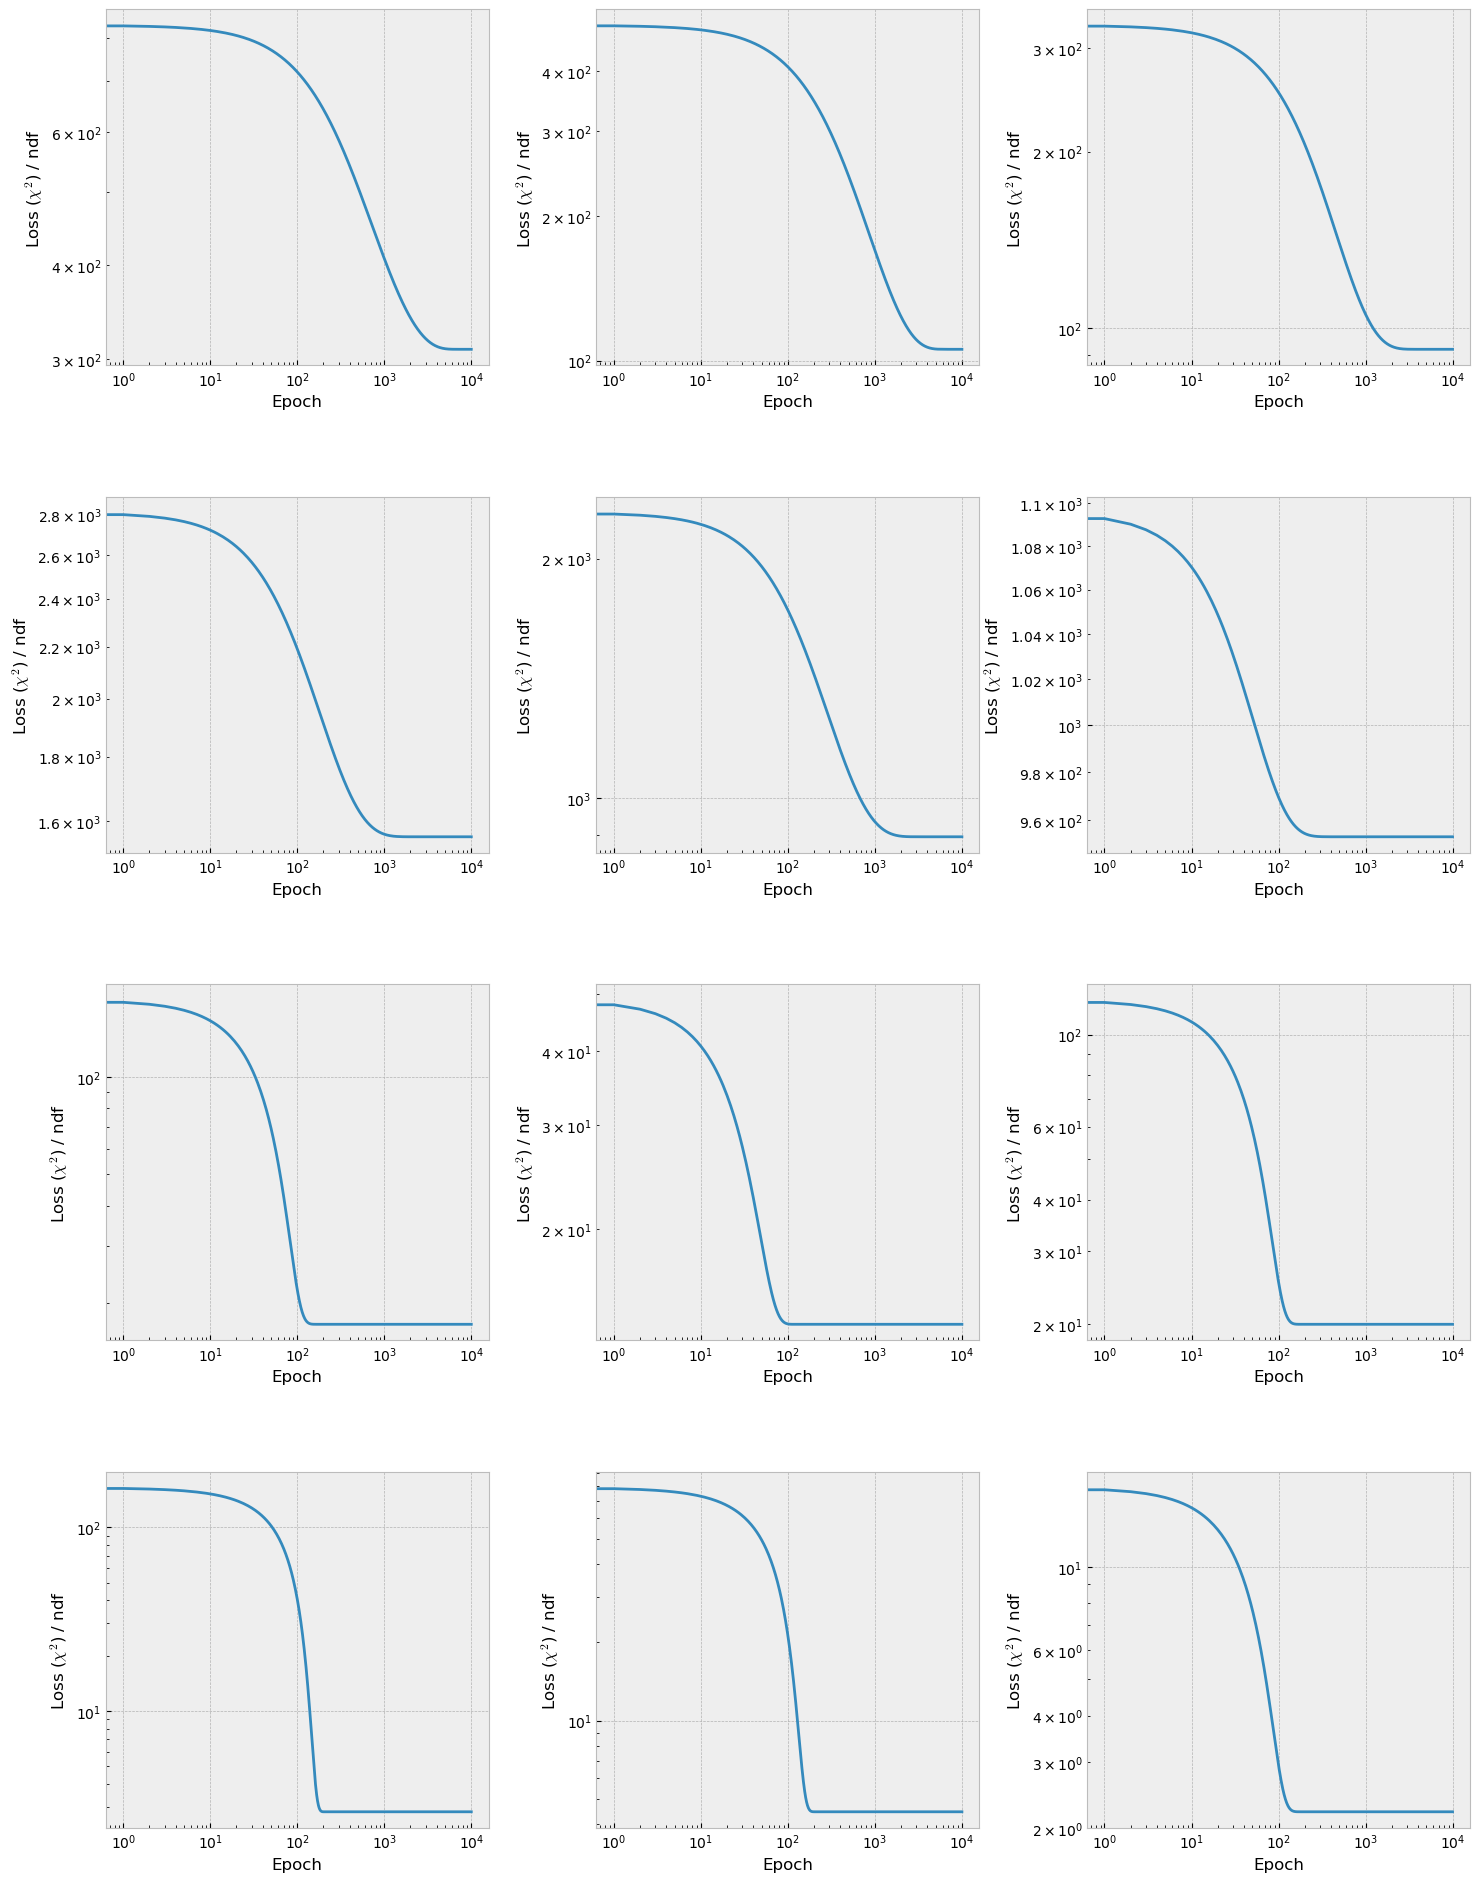

In [21]:
fig_k, ax_k = plot_losses(losses_all_k, range_used)

Maybe covariance matrix:
tensor([[ 3.1908e-05, -3.4479e-04],
        [-3.4479e-04,  9.9190e-03]])
Compare:
Old: 12628.10499883848, new: 0.005648747822048663
Old: 33035.358041511805, new: 0.09959437219917942
Old: 246980.67494451758, new: 0.148007185066433, new/old: 5.992662587859627e-07
Maybe covariance matrix:
tensor([[ 4.1062e-05, -4.5372e-04],
        [-4.5372e-04,  1.3947e-02]])
Compare:
Old: 2309.9793539830343, new: 0.006407951698301987
Old: 7068.215217876957, new: 0.1180965727390254
Old: 40204.78466315087, new: 0.1612486512790104, new/old: 4.010683122170794e-06
Maybe covariance matrix:
tensor([[ 4.5694e-05, -3.7408e-04],
        [-3.7408e-04,  8.5663e-03]])
Compare:
Old: 813.5097450017245, new: 0.006759761686562965
Old: 2657.5318645103703, new: 0.09255416455430644
Old: 8310.032414372603, new: 0.1133433271901853, new/old: 1.363933635134233e-05
Maybe covariance matrix:
tensor([[ 5.0701e-06, -2.3518e-05],
        [-2.3518e-05,  2.5774e-04]])
Compare:
Old: 0.3456252870688301, new: 0.0

Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_0_k.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_0_k.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/comparison_2.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_0_k.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_3_k.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_3_k.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/comparison_5.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_3_k.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_6_k.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_cmp_6_k.gif has been created
Info in <TCanvas::

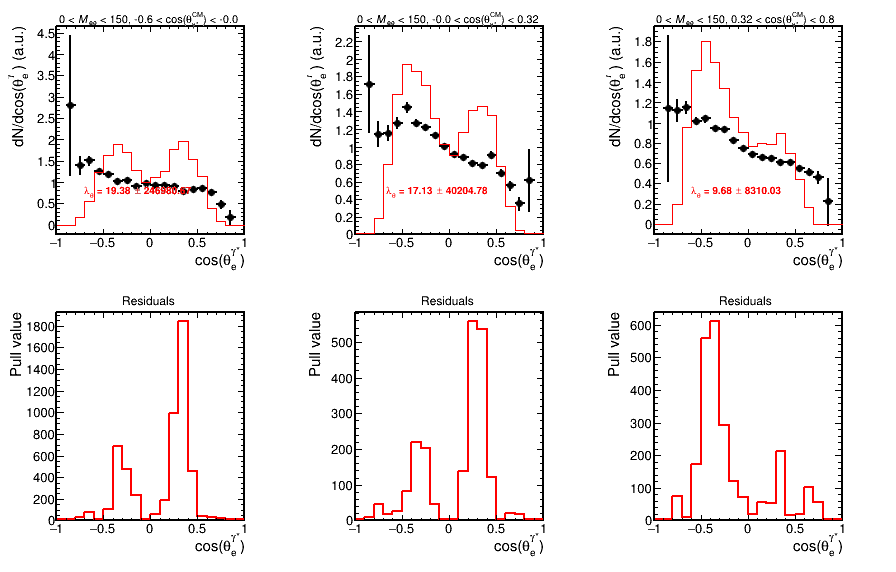

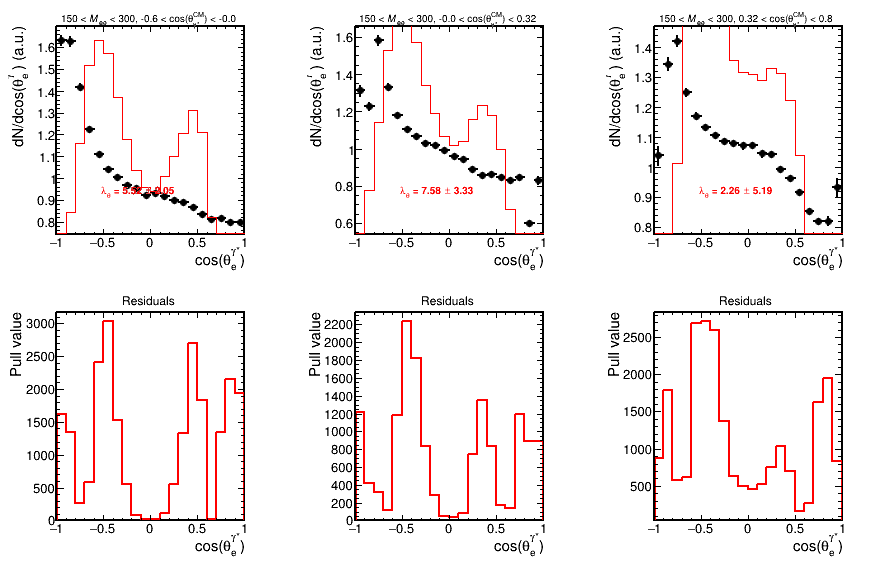

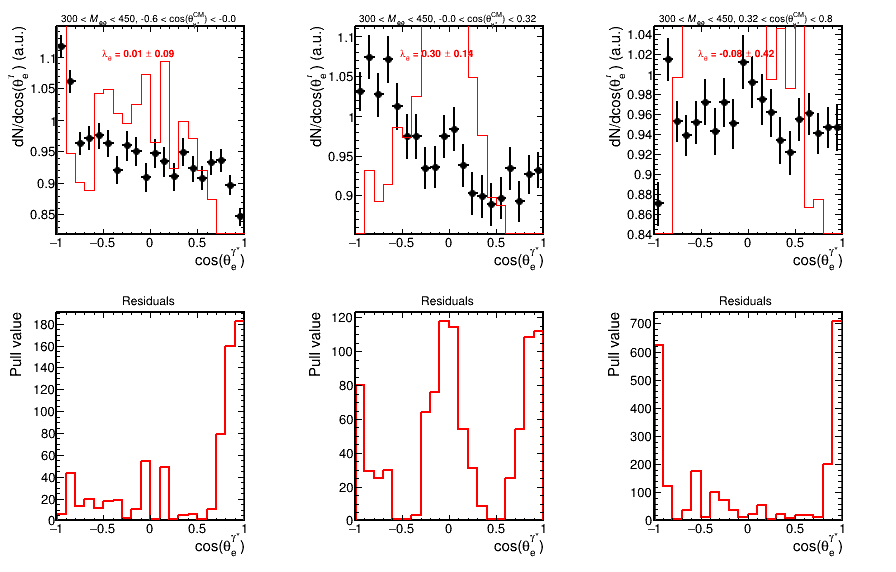

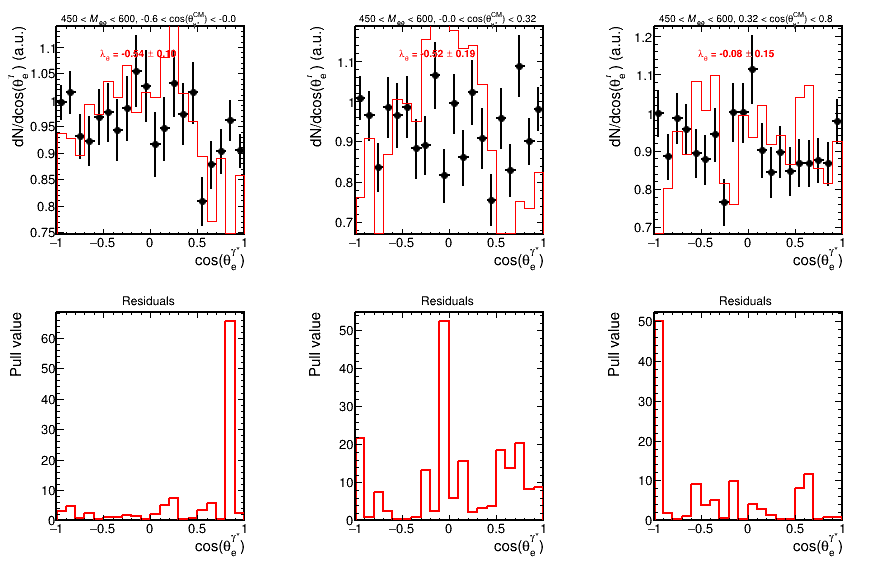

In [22]:
df_k = show_results("k", DIR_NAME, range_used, parameters_all_k, get_hist_maker_mc, bins, histsData_k, analyse_3d)

Warning in <TROOT::Append>: Replacing existing TH1: hist_0to150_m06p00_data_pp_iter2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_0to150_m06p00_data_pp_mix_iter11 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_0to150_m06p00_data_pp_iter2_corr (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_0to150_p00p03_data_pp_iter2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_0to150_p00p03_data_pp_mix_iter11 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_0to150_p00p03_data_pp_iter2_corr (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_0to150_p03p08_data_pp_iter2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_0to150_p03p08_data_pp_mix_iter11 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_0to150_p03p08_data_pp_iter2_corr (Pote

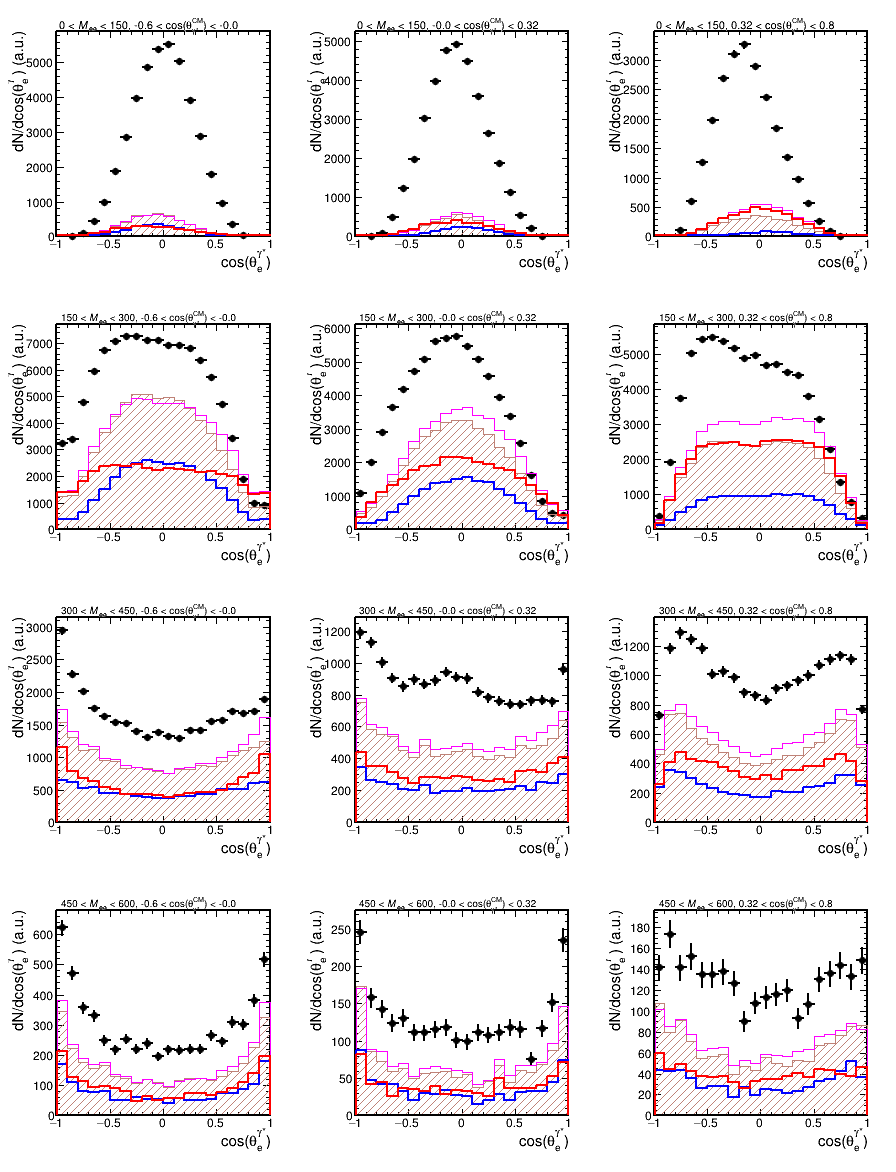

In [23]:
if not analyse_3d:
    histsDataCorrs = []
    histsDatas = []
    histsModels = []
    legends = []
    hmodel_null = histMakerMC_rho_heli0_np.make_hists((0.0))
    hmodel_null_pp = histMakerMC_rho_heli0_pp.make_hists((0.0))
    hmodel_null_nn = histMakerMC_rho_heli0_nn.make_hists((0.0))
    hmodel_null_mix = histMakerMC_mix.make_hists((0.0))
    hmodel_null_pi0 = histMakerMC_pi0.make_hists((0.0))
    hmodel_null_heli1 = histMakerMC_rho_heli1.make_hists((0.0))

    pol2s = []
    histsAvg = []
    kfactors = []

    cc4 = TCanvas("cc4","cc4",900,1200)
    cc4.Divide(3,4)
    cc4.Draw()

    cck = TCanvas("cck","cck",900,1200)
    cck.Divide(3,4)

    csig = TCanvas("csig","csig",900,1200)
    csig.Divide(3,4)

    cacc = TCanvas("cacc","cacc",900,1200)
    cacc.Divide(3,4)

    for i, hist_np in enumerate(histsData_np[0]):
    
        if not isinstance(hist_np, list):

            hist_pp = histsData_pp[0][i]
            hist_nn = histsData_nn[0][i]
        
            if symmetrize_explicit:
                symmetrize(hist_np)
                symmetrize(hist_pp)
                symmetrize(hist_nn)
        
            histAvg = geom_avg1d(hist_pp, hist_nn, 0.2)
            histsAvg.append(histAvg)

        
            histCorr_np = hist_np.Clone(hist_np.GetName() + "_corr")
            histCorr_pp = hist_pp.Clone(hist_pp.GetName() + "_corr")
            histCorr_nn = hist_nn.Clone(hist_nn.GetName() + "_corr")
            histsDataCorrs.append(histCorr_np)
            histsDataCorrs.append(histCorr_pp)
            histsDataCorrs.append(histCorr_nn)
            histCorr_np.GetXaxis().SetTitle(xtitle_root)
        
            pad = cc4.cd(i+1)
            set_pad(pad)       
       
            hist_kfactor = histsData_np_mix[0][i]
            hist_pp_mix = histsData_pp_mix[0][i]
            hist_nn_mix = histsData_nn_mix[0][i]

            if symmetrize_explicit:
                symmetrize(hist_kfactor)
                symmetrize(hist_pp_mix)
                symmetrize(hist_nn_mix)

            histAvg_mix = geom_avg1d(hist_pp_mix, hist_nn_mix, 0.2)
            hist_kfactor.Divide(histAvg_mix)
            hist_kfactor.Scale(2)
            kfactors.append(hist_kfactor)

            pad = cck.cd(i+1)
            set_pad(pad)

            hist_kfactor.GetXaxis().SetTitle(xtitle_root)
        
            set_th1(hist_kfactor, histCorr_np.GetXaxis().GetTitle(), "#it{k}-factor", 
                   505, 20, 0.8, 1)
            hist_pp_mix.SetLineColor(2)
            hist_nn_mix.SetLineColor(4)
            hist_pp_mix.SetMarkerColor(2)
            hist_nn_mix.SetMarkerColor(4)
            hist_kfactor.Draw()
            hist_pp_mix.Draw("SAME")
            hist_nn_mix.Draw("SAME")
            hist_kfactor.SetMinimum(0)
             
            pad = cc4.cd(i+1)
            set_pad(pad)       
            
            histAvg_withK = histAvg.Clone(histAvg.GetName() + "_withK")
            histsAvg.append(histAvg_withK)
            histAvg_withK.Multiply(hist_kfactor)
            
            histAvg_withK.SetFillStyle(3004)
            histAvg_withK.SetFillColor(45)
            histAvg_withK.SetLineColor(45)
            histAvg.SetLineColor(6)
            hist_pp.SetLineColor(4)
            hist_nn.SetLineColor(2)
                    
            set_th1(hist_np, histCorr_np.GetXaxis().GetTitle(), f"dN/d{histCorr_np.GetXaxis().GetTitle()} (a.u.)", 
                   505, 20, 0.8, 1)
            hist_np.SetMinimum(0)
            hist_np.Draw()
            histAvg_withK.Draw("SAMEHIST")
            histAvg.Draw("SAMEHIST")
            hist_pp.Draw("SAMEHIST")
            hist_nn.Draw("SAMEHIST")
            
            pad = csig.cd(i+1)
            set_pad(pad)     
    
            hist_model_np = hmodel_null_mix[0][i]
            # TODO: make it consistent if we go the way of using mixing
            hist_model_pp = hmodel_null_mix[0][i]
            hist_model_nn = hmodel_null_mix[0][i]
            if not event_mixing:
                if i < 3:
                    hist_model_np = hmodel_null_pi0[0][i]
                    # TODO: make is consisnt if combinatorial background really matters for the pi0 region
                    hist_model_pp = hmodel_null_pi0[0][i]
                    hist_model_nn = hmodel_null_pi0[0][i]
                else:
                    hist_model_np = hmodel_null[0][i]
                    hist_model_pp = hmodel_null_pp[0][i]
                    hist_model_nn = hmodel_null_nn[0][i]
            if symmetrize_explicit:
                symmetrize(hist_model_np)
    
           # histCorr_np.Add(histAvg_withK,-1)
            histCorr_np.Divide(hist_model_np)
            histCorr_pp.Divide(hist_model_pp)
            histCorr_nn.Divide(hist_model_nn)
            
            histAvgCorr = geom_avg1d(histCorr_pp, histCorr_nn, 0.2)
            histsAvg.append(histAvgCorr)
            histAvgCorr_withK = histAvgCorr.Clone(histAvgCorr.GetName() + "_withK")
            histsAvg.append(histAvgCorr_withK)
            histAvgCorr_withK.Multiply(hist_kfactor)
        
            s2b = (hist_np.Integral() - histAvg_withK.Integral()) / histAvg_withK.Integral()
            s2b_corr = (histCorr_np.Integral() - histAvgCorr_withK.Integral()) / histAvgCorr_withK.Integral()
            histCorr_pp.Scale(s2b/s2b_corr)
            histCorr_nn.Scale(s2b/s2b_corr)
            histAvgCorr.Scale(s2b/s2b_corr)
            histAvgCorr_withK.Scale(s2b/s2b_corr)
        
            histAvgCorr_withK.SetFillStyle(3004)
            histAvgCorr_withK.SetFillColor(45)
            histAvgCorr_withK.SetLineColor(45)
            histAvgCorr.SetLineColor(6)
    
            #if symmetrize_explicit:    
                #symmetrize(histCorr_np)
    
            fit = TF1(f"fit_{i}", "[0]*(1+[1]*x*x)",-1.0,1.0)
            fit.SetParameters(1, 1)
            
            histCorr_np.Fit(fit,"Q")
            pol2s.append(fit)
        
            set_th1(histCorr_np, histCorr_np.GetXaxis().GetTitle(), f"dN/d{histCorr_np.GetXaxis().GetTitle()} (a.u.)", 
                   505, 20, 0.8, 1)
        
            histCorr_pp.SetLineColor(4)
            histCorr_nn.SetLineColor(2)
            histCorr_np.Draw()
            histCorr_pp.Draw("SAMEHIST")
            histCorr_nn.Draw("SAMEHIST")
            histAvgCorr.Draw("SAMEHIST")
            histAvgCorr_withK.Draw("SAMEHIST")
            if i < 3:
                # histCorr_np.GetYaxis().SetRangeUser(0,2.5)
                histCorr_np.GetYaxis().SetRangeUser(0,20)
            else:
                # histCorr_np.GetYaxis().SetRangeUser(0,1.25)    
                histCorr_np.GetYaxis().SetRangeUser(0,2)    
            histCorr_np.SetMinimum(0)
            
            caption = f"#lambda_{{#theta}} = {fit.GetParameter(1):.2f} #pm {fit.GetParError(1):.2f}"
            paveText = set_opt_text(caption, 0.25,0.76,0.675,0.88, 2, 0.04)
            paveTexts.append(paveText)
    
            if i == 4:
                l = TLegend(0.3,0.45,0.8,0.8)
                l.SetBorderSize(0)
                l.AddEntry(histCorr_np,"e+e- pairs","pl")
                l.AddEntry(histCorr_pp,"e+e+ pairs","l")
                l.AddEntry(histCorr_nn,"e-e- pairs","l")
                l.AddEntry(histAvgCorr,"geom. mena","pl")
                l.AddEntry(histAvgCorr_withK,"geom. mena with k-factor","pl")
                l.Draw()
                legends.append(l)
            
    
            pad = cacc.cd(i+1)
            set_pad(pad)
            
            hacc_heli0 = hmodel_null[0][i]
            hacc_heli1 = hmodel_null_heli1[0][i]
    
        else:
            print(hist_np)
    
    cc4.SaveAs(f"{DIR_NAME}/fit_classic.gif")
    cc4.SaveAs(f"{DIR_NAME}/fit_classic.pdf")
        


Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/kfactor.gif has been created
Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/signal.gif has been created
Info in <TCanvas::Print>: eps file results_ag1580ag_1d_nosymm_HX/signal.eps has been created


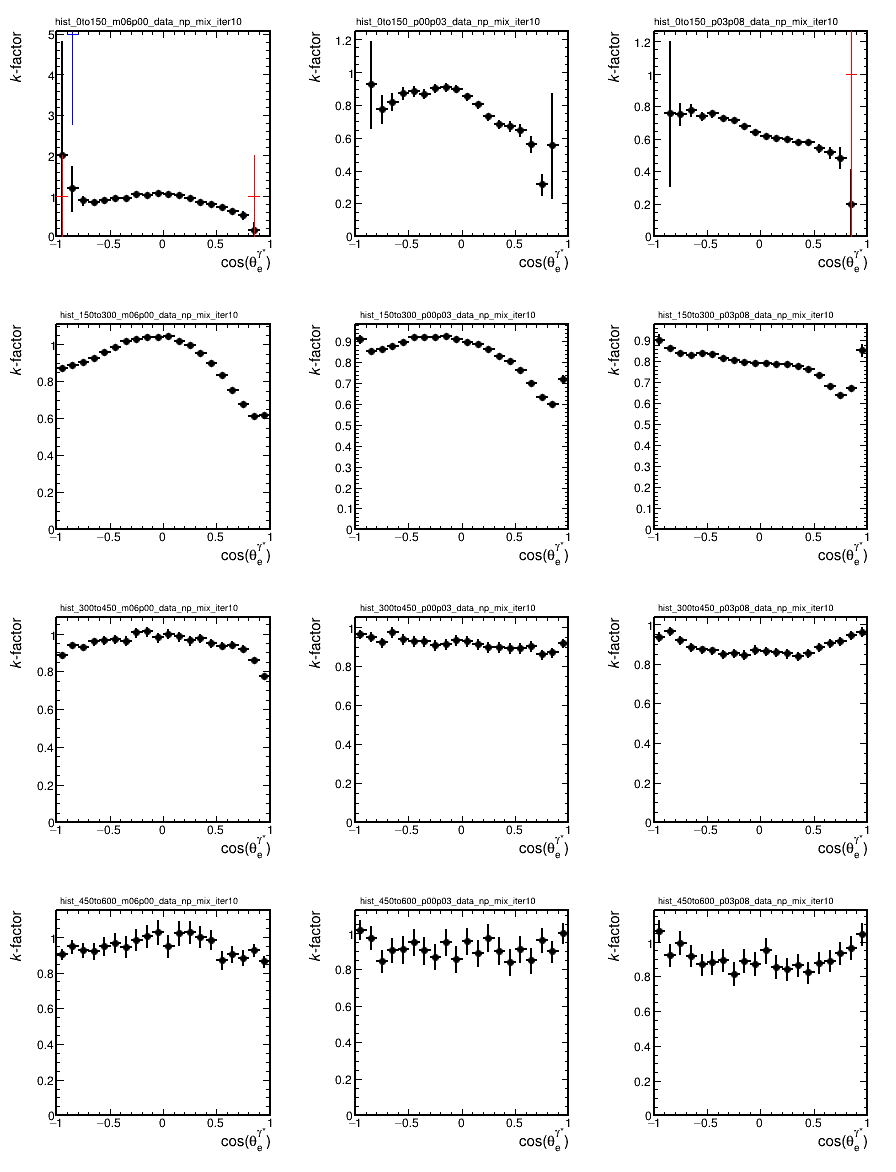

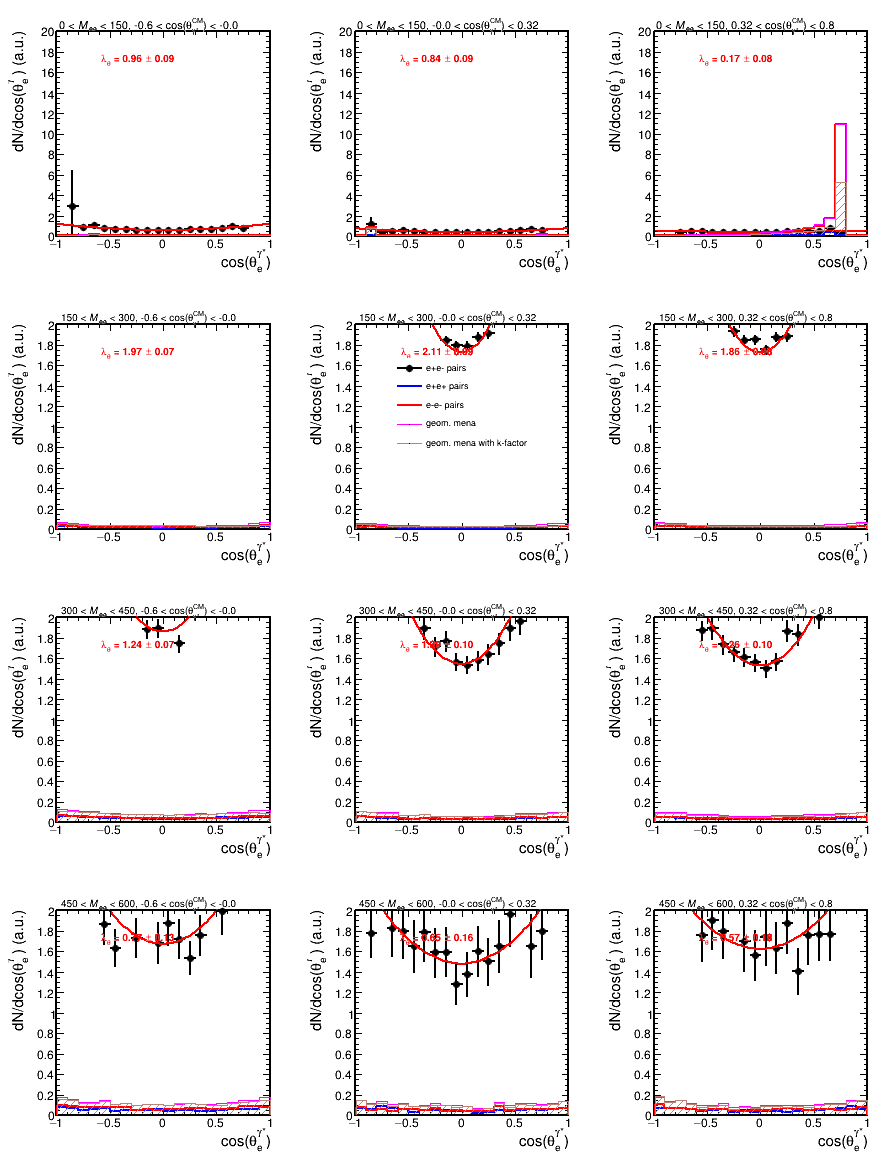

In [24]:
if not analyse_3d:
    cck.Draw()
    cck.SaveAs(f"{DIR_NAME}/kfactor.gif")
    
    csig.Draw()
    csig.SaveAs(f"{DIR_NAME}/signal.gif")
    csig.SaveAs(f"{DIR_NAME}/signal.eps")


Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_mass_z_np.gif has been created


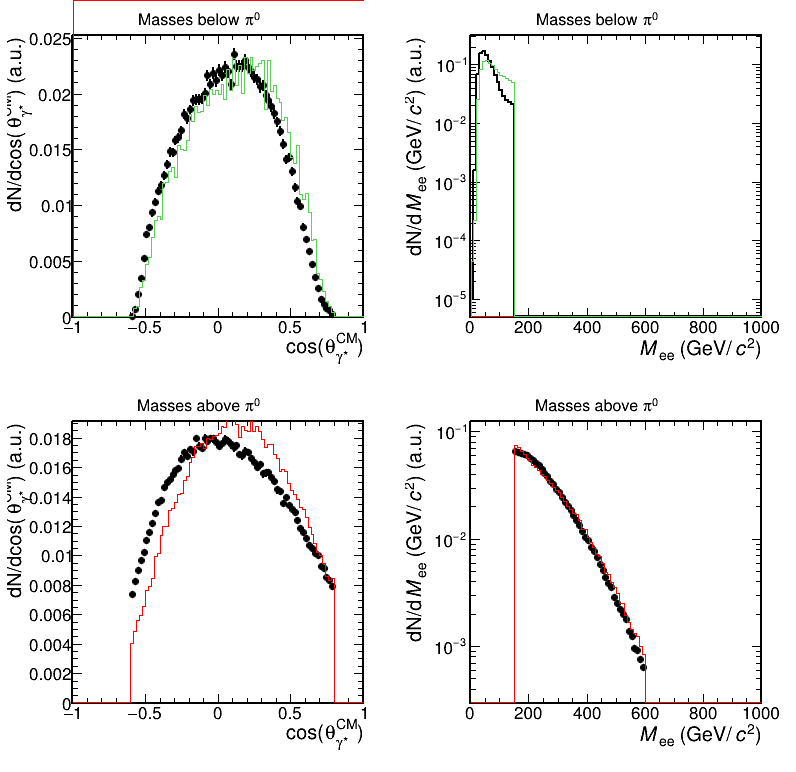

In [25]:
can_mass_z_np = show_mass_z(histsData_np, histMakerMC_pi0, histMakerMC_rho_heli0_np, histMakerMC_mix, event_mixing, fraction, DIR_NAME, "np")

Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_mass_z_pp.gif has been created


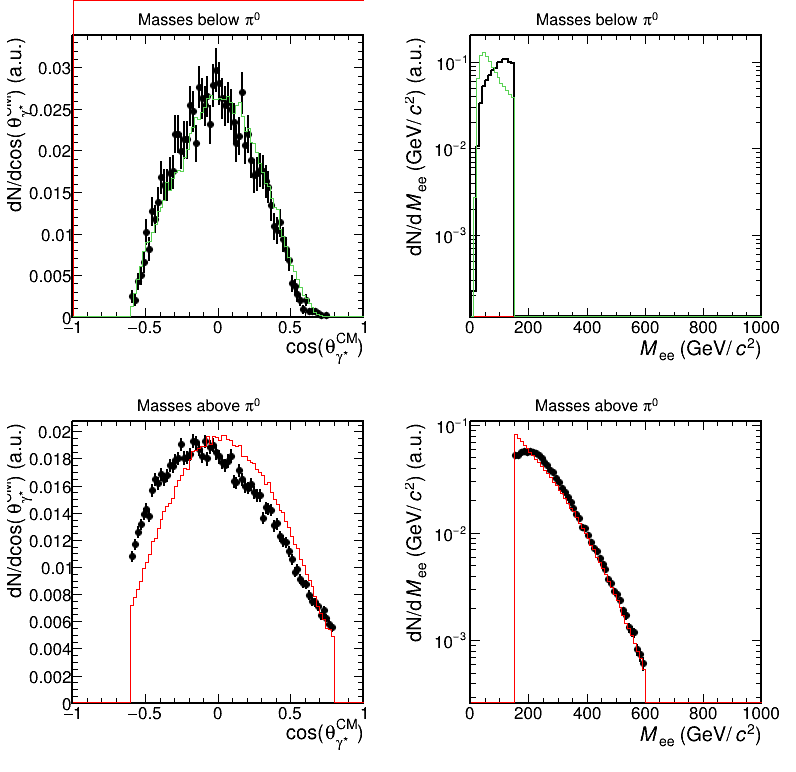

In [26]:
can_mass_z_pp = show_mass_z(histsData_pp, histMakerMC_pi0, histMakerMC_rho_heli0_pp, histMakerMC_mix, event_mixing, fraction, DIR_NAME, "pp")

Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_mass_z_nn.gif has been created


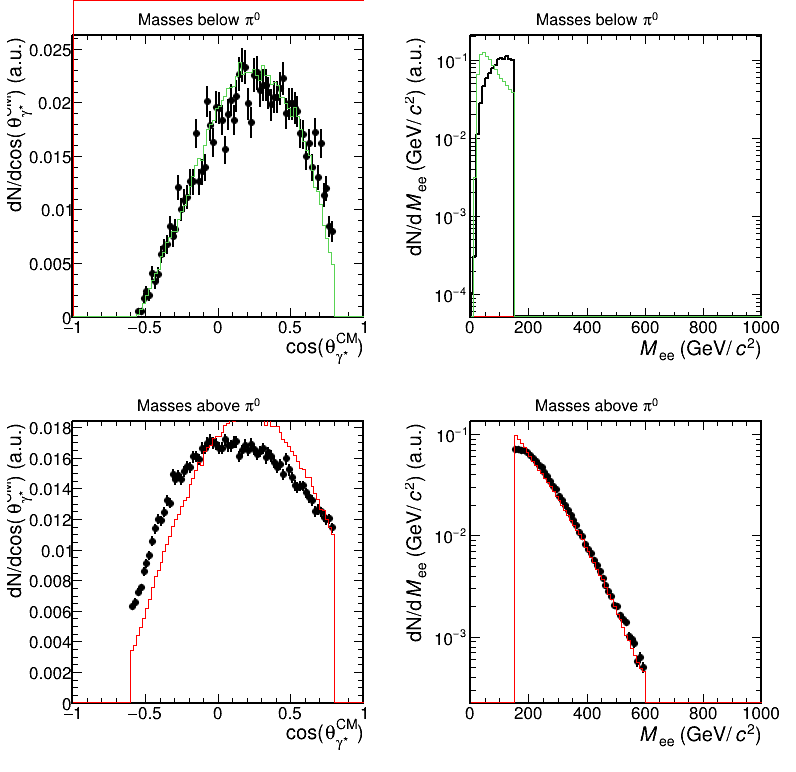

In [27]:
can_mass_z_np = show_mass_z(histsData_nn, histMakerMC_pi0, histMakerMC_rho_heli0_nn, histMakerMC_mix, event_mixing, fraction, DIR_NAME, "nn")

Info in <TCanvas::Print>: gif file results_ag1580ag_1d_nosymm_HX/can_mass_z_sig.gif has been created


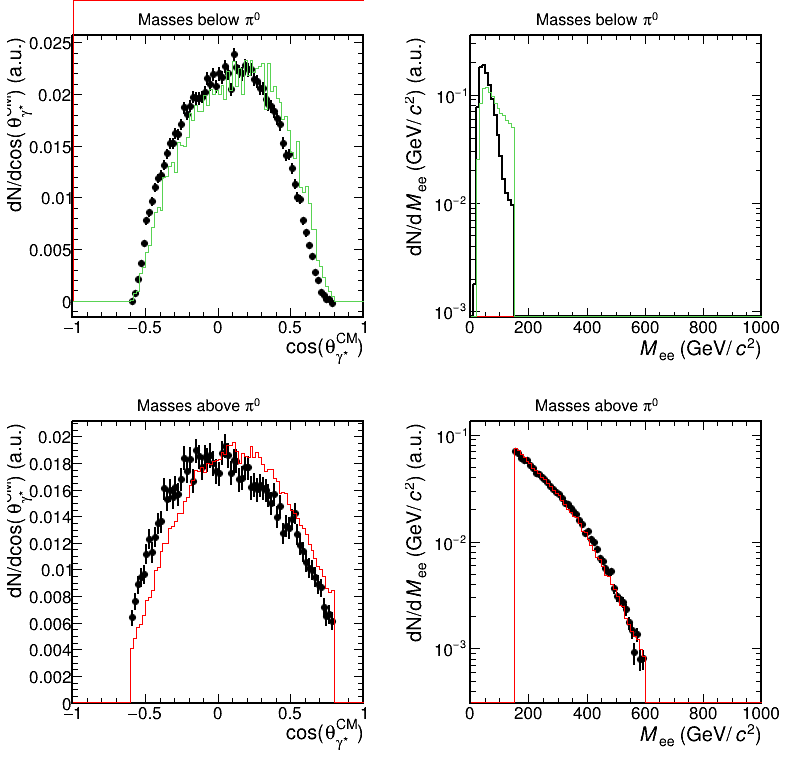

In [28]:
can_mass_z_sig = show_mass_z(histsData_sig, histMakerMC_pi0, histMakerMC_rho_heli0_np, histMakerMC_mix, event_mixing, fraction, DIR_NAME, "sig")

ASImage2gif():1010:<results_ag1580ag_1d_nosymm_HX/cacc.gif> 
GIF-LIB undefined error 0.
Error in <TASImage::WriteImage>: error writing file results_ag1580ag_1d_nosymm_HX/cacc.gif


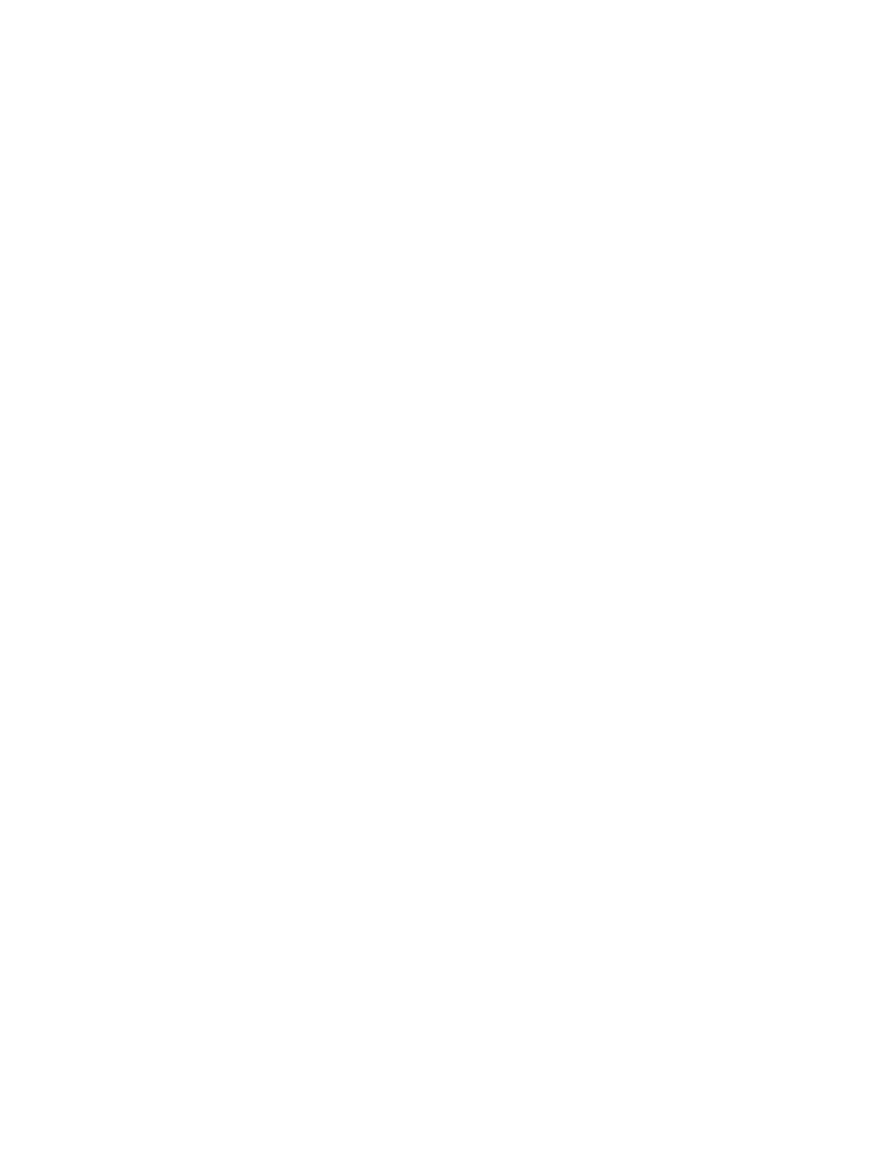

In [29]:
if not analyse_3d:
    cacc.Draw()
    cacc.SaveAs(f"{DIR_NAME}/cacc.gif")

In [30]:
import math
import pandas as pd

a_np = df_np['yield']/(math.pi * (df_np['lambda_theta'] + 3)) * (3./4)
a_pp = df_pp['yield']/(math.pi * (df_pp['lambda_theta'] + 3)) * (3./4)
a_nn = df_nn['yield']/(math.pi * (df_nn['lambda_theta'] + 3)) * (3./4)

yield_sig = df_np['yield'] - df_pp['yield'] - df_nn['yield'] 

term_np = (4./15) * a_np * math.pi * (5 + 3*df_np['lambda_theta'])
term_pp = (4./15) * a_pp * math.pi * (5 + 3*df_pp['lambda_theta'])
term_nn = (4./15) * a_nn * math.pi * (5 + 3*df_nn['lambda_theta'])

term_x = term_np - 1.0*(term_pp + term_nn)
lambda_theta_sig = (3 * term_x - 5 * yield_sig) / (3 * yield_sig - term_x)

a_sig = yield_sig/(math.pi * (lambda_theta_sig + 3)) * (3./4)

lambda_phi_sig = (a_np * df_np['lambda_phi'] - a_pp * df_pp['lambda_phi'] - a_nn * df_nn['lambda_phi']) / a_sig
lambda_theta_phi_sig = (a_np * df_np['lambda_theta_phi'] - a_pp * df_pp['lambda_theta_phi'] - a_nn * df_nn['lambda_theta_phi']) / a_sig

df_result = pd.DataFrame(columns=['a_np', 'a_pp', 'a_nn', 'yield_sig', 'term_np', 'term_pp', 'term_nn', 'term_x', 'a_sig', 'lambda_theta_sig', 'lambda_phi_sig', 'lambda_theta_phi_sig'])
df_result['a_np'] = a_np
df_result['a_pp'] = a_pp
df_result['a_nn'] = a_nn
df_result['term_np'] = term_np
df_result['term_pp'] = term_pp
df_result['term_nn'] = term_nn
df_result['term_x'] = term_x
df_result['yield_sig'] = yield_sig
df_result['a_sig'] = a_sig
df_result['lambda_theta_sig'] = lambda_theta_sig
df_result['lambda_phi_sig'] = lambda_phi_sig
df_result['lambda_theta_phi_sig'] = lambda_theta_phi_sig

df_result

KeyError: 'lambda_phi'